# Project 1 - SAT & ACT Analysis - Caitlin Streamer

### Personal website: https://caitlinstreamer.wordpress.com/portfolio/sat-act-analysis/ 

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
# Bring in libraries, set some variables for the whole notebook
import numpy as np
import pandas as pd
import scipy.stats as stats
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Load the SAT and ACT datasets using pandas 
sat_data = pd.read_csv('data/sat.csv')
act_data = pd.read_csv('data/act.csv')

##### 2. Print the first ten rows of each dataframe.

In [3]:
# Printing the head of the SAT dataframe
sat_data.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


In [4]:
# Printing the head of the ACT dataframe - ACT has a national row, SAT not
act_data.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


##### 3. Describe in words what each variable (column) is.

For the SAT dataframe (from left to right): 
- Pandas generated index (integer)
- Unnamed column which appears to be the dataframe index (integer)
- State in the USA for which the SAT data is from (string object) 
- Participation rate for taking the SAT (string object)
- Average Evidenced Based Reading and Writing score on the SAT (integer)
- Average Math score on the SAT (integer)
- Average total combined (Math + Reading/Writing) score on SAT (integer) 

For the ACT dataframe (from left to right): 
- Pandas generated index (integer)
- Unnamed column which appears to be the dataframe index (integer)
- State in the USA for which the ACT data is from (string object) 
- Participation rate for taking the ACT (string object)
- Average English score on the ACT (float)
- Average Math score on the ACT (float)
- Average Science score on the ACT (float)
- Average total composite (Math + English + Science) score on ACT (float) 



##### 4. Does the data look complete? Are there any obvious issues with the observations?

Yes, the data for both sets looks complete. I also checked for missing data below to confirm. 

In [5]:
# Check types, count of non-null values by column 
act_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
Unnamed: 0       52 non-null int64
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ KB


In [6]:
# Check types, count of non-null values by column 
sat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0                            51 non-null int64
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [7]:
# Check for NaN values 
act_data.isna().sum()

Unnamed: 0       0
State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [8]:
# Check for NaN values
sat_data.isna().sum()

Unnamed: 0                            0
State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [9]:
# Check that SAT stats make sense 
sat_data.describe()

,Unnamed: 0,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,25.000000,569.117647,547.627451,1126.098039
std,14.866069,45.666901,84.909119,92.494812
min,0.000000,482.000000,52.000000,950.000000
25%,12.500000,533.500000,522.000000,1055.500000
50%,25.000000,559.000000,548.000000,1107.000000
75%,37.500000,613.000000,599.000000,1212.000000
max,50.000000,644.000000,651.000000,1295.000000


In [10]:
# Check that ACT stats make sense 
act_data.describe()

,Unnamed: 0,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,25.500000,20.919231,21.173077,22.001923,21.040385,21.509615
std,15.154757,2.332132,1.963602,2.048672,3.151113,2.002083
min,0.000000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,12.750000,19.000000,19.400000,20.475000,19.900000,19.800000
50%,25.500000,20.550000,20.900000,21.700000,21.150000,21.400000
75%,38.250000,23.300000,23.100000,24.125000,22.525000,23.600000
max,51.000000,25.500000,25.300000,26.000000,24.900000,25.500000


Neither dataframe has missing data. ACT has a national row, and SAT doesn't.

##### 5. Print the types of each column.

In [11]:
# Confirming SAT column datatypes 
sat_data.dtypes

Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [12]:
# Confirming ACT column datatypes 
act_data.dtypes

Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

Yes, for both dataframes the participation string objects should be converted to floats so that they can be used in computations later. I will also change the SAT integer types into floats for consistency 

In [13]:
# Remove percent signs, convert to float, and change percents into decimals (divide by 100) for future calculation
sat_data.Participation = sat_data['Participation'].str.replace('%', '').astype(float)/100
act_data.Participation = act_data['Participation'].str.replace('%', '').astype(float)/100
sat_data.Math = sat_data.Math.astype(float)
sat_data.Total = sat_data.Total.astype(float)
sat_data['Evidence-Based Reading and Writing'] = sat_data['Evidence-Based Reading and Writing'].astype(float)

In [14]:
# Drop the unnamed columns from both dataframes since they are a repeat of the index values 
sat_data = sat_data.drop('Unnamed: 0', axis = 1)
act_data = act_data.drop('Unnamed: 0', axis = 1)

In [15]:
# Confirm datatype change 
sat_data.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

In [16]:
# Confirm datatype change 
act_data.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [17]:
# SAT dictionaries
sat_math = dict(zip(sat_data.State, sat_data.Math))
sat_rw = dict(zip(sat_data.State, sat_data['Evidence-Based Reading and Writing']))
sat_part = dict(zip(sat_data.State, sat_data.Participation))
sat_total = dict(zip(sat_data.State, sat_data.Total))

In [18]:
# ACT dictionaries
act_math = dict(zip(act_data.State, act_data.Math))
act_eng = dict(zip(act_data.State, act_data.English))
act_read = dict(zip(act_data.State, act_data.Reading))
act_sci = dict(zip(act_data.State, act_data.Science))
act_part = dict(zip(act_data.State, act_data.Participation))
act_composite = dict(zip(act_data.State, act_data.Composite))

In [19]:
# Sample dictionary output from SAT Math dictionary above 
# Select first five key value pair only 
dict(itertools.islice(sat_math.items(), 5))

{'Alabama': 572.0,
 'Alaska': 533.0,
 'Arizona': 553.0,
 'Arkansas': 594.0,
 'California': 524.0}

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [20]:
# SAT dictionary 
keys = sat_data.columns
sat_dict = {}
for key in keys:
    sat_dict[key] = list(sat_data[key])

# Select first key value pair only 
dict(itertools.islice(sat_dict.items(), 1))

{'State': ['Alabama',
  'Alaska',
  'Arizona',
  'Arkansas',
  'California',
  'Colorado',
  'Connecticut',
  'Delaware',
  'District of Columbia',
  'Florida',
  'Georgia',
  'Hawaii',
  'Idaho',
  'Illinois',
  'Indiana',
  'Iowa',
  'Kansas',
  'Kentucky',
  'Louisiana',
  'Maine',
  'Maryland',
  'Massachusetts',
  'Michigan',
  'Minnesota',
  'Mississippi',
  'Missouri',
  'Montana',
  'Nebraska',
  'Nevada',
  'New Hampshire',
  'New Jersey',
  'New Mexico',
  'New York',
  'North Carolina',
  'North Dakota',
  'Ohio',
  'Oklahoma',
  'Oregon',
  'Pennsylvania',
  'Rhode Island',
  'South Carolina',
  'South Dakota',
  'Tennessee',
  'Texas',
  'Utah',
  'Vermont',
  'Virginia',
  'Washington',
  'West Virginia',
  'Wisconsin',
  'Wyoming']}

In [21]:
# ACT dictionary 
keys = act_data.columns
act_dict = {}
for key in keys:
    act_dict[key] = list(act_data[key])

# Select first key value pair only 
dict(itertools.islice(act_dict.items(), 1))

{'State': ['National',
  'Alabama',
  'Alaska',
  'Arizona',
  'Arkansas',
  'California',
  'Colorado',
  'Connecticut',
  'Delaware',
  'District of Columbia',
  'Florida',
  'Georgia',
  'Hawaii',
  'Idaho',
  'Illinois',
  'Indiana',
  'Iowa',
  'Kansas',
  'Kentucky',
  'Louisiana',
  'Maine',
  'Maryland',
  'Massachusetts',
  'Michigan',
  'Minnesota',
  'Mississippi',
  'Missouri',
  'Montana',
  'Nebraska',
  'Nevada',
  'New Hampshire',
  'New Jersey',
  'New Mexico',
  'New York',
  'North Carolina',
  'North Dakota',
  'Ohio',
  'Oklahoma',
  'Oregon',
  'Pennsylvania',
  'Rhode Island',
  'South Carolina',
  'South Dakota',
  'Tennessee',
  'Texas',
  'Utah',
  'Vermont',
  'Virginia',
  'Washington',
  'West Virginia',
  'Wisconsin',
  'Wyoming']}

##### 9. Merge the dataframes on the state column.

In [22]:
# Merge SAT and ACT dataframes on state column 
combined_tests = pd.merge(sat_data, act_data, on = "State") 
combined_tests.head(10)

,State,Participation_x,Evidence-Based Reading and Writing,Math_x,Total,Participation_y,English,Math_y,Reading,Science,Composite
0,Alabama,0.05,593.0,572.0,1165.0,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547.0,533.0,1080.0,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563.0,553.0,1116.0,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614.0,594.0,1208.0,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531.0,524.0,1055.0,0.31,22.5,22.7,23.1,22.2,22.8
5,Colorado,0.11,606.0,595.0,1201.0,1.00,20.1,20.3,21.2,20.9,20.8
6,Connecticut,1.00,530.0,512.0,1041.0,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503.0,492.0,996.0,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,1.00,482.0,468.0,950.0,0.32,24.4,23.5,24.9,23.5,24.2
9,Florida,0.83,520.0,497.0,1017.0,0.73,19.0,19.4,21.0,19.4,19.8


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [23]:
combined_tests = combined_tests.rename(columns = {"Participation_x":"SAT Participation", 
                                                  "Evidence-Based Reading and Writing": "SAT Evidence-Based Reading and Writing",
                                                  "Math_x": "SAT Math", 
                                                  "Total": "SAT Total",
                                                  "Participation_y": "ACT Participation",
                                                  "English": "ACT English",
                                                 "Math_y": "ACT Math",
                                                 "Reading": "ACT Reading",
                                                 "Science": "ACT Science",
                                                 "Composite": "ACT Composite"})

combined_tests.head(10)

,State,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite
0,Alabama,0.05,593.0,572.0,1165.0,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547.0,533.0,1080.0,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563.0,553.0,1116.0,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614.0,594.0,1208.0,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531.0,524.0,1055.0,0.31,22.5,22.7,23.1,22.2,22.8
5,Colorado,0.11,606.0,595.0,1201.0,1.00,20.1,20.3,21.2,20.9,20.8
6,Connecticut,1.00,530.0,512.0,1041.0,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503.0,492.0,996.0,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,1.00,482.0,468.0,950.0,0.32,24.4,23.5,24.9,23.5,24.2
9,Florida,0.83,520.0,497.0,1017.0,0.73,19.0,19.4,21.0,19.4,19.8


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [24]:
print("Minimum values")
print(combined_tests.min())
print('\n')
print("Maximum values")
print(combined_tests.max())

Minimum values
State                                     Alabama
SAT Participation                            0.02
SAT Evidence-Based Reading and Writing        482
SAT Math                                       52
SAT Total                                     950
ACT Participation                            0.08
ACT English                                  16.3
ACT Math                                       18
ACT Reading                                  18.1
ACT Science                                   2.3
ACT Composite                                17.8
dtype: object


Maximum values
State                                     Wyoming
SAT Participation                               1
SAT Evidence-Based Reading and Writing        644
SAT Math                                      651
SAT Total                                    1295
ACT Participation                               1
ACT English                                  25.5
ACT Math                                     25.3
ACT 

##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [25]:
# Calculating standard deviation 
def std(population):
    n = len(population)
    mean = sum(population)/n
    differences = [(value - mean) for value in population]
    squares = [(diff ** 2) for diff in differences]
    sqrt = ((1/n) * sum(squares))** 0.5
    return sqrt 

In [26]:
sd = combined_tests.select_dtypes(include = ['float64']).apply(std)
sd

SAT Participation                          0.349291
SAT Evidence-Based Reading and Writing    45.216970
SAT Math                                  84.072555
SAT Total                                 91.583511
ACT Participation                          0.318242
ACT English                                2.330488
ACT Math                                   1.962462
ACT Reading                                2.046903
ACT Science                                3.151108
ACT Composite                              2.000786
dtype: float64

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [27]:
# Adding sd as a row, displaying the tail (end) of the dataframe
combined_tests_sd = combined_tests.append(sd, ignore_index = True)
combined_tests_sd.tail()

,State,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite
47,Washington,0.640000,541.00000,534.000000,1075.000000,0.290000,20.900000,21.900000,22.100000,22.000000,21.900000
48,West Virginia,0.140000,558.00000,528.000000,1086.000000,0.690000,20.000000,19.400000,21.200000,20.500000,20.400000
49,Wisconsin,0.030000,642.00000,649.000000,1291.000000,1.000000,19.700000,20.400000,20.600000,20.900000,20.500000
50,Wyoming,0.030000,626.00000,604.000000,1230.000000,1.000000,19.400000,19.800000,20.800000,20.600000,20.200000
51,NaN,0.349291,45.21697,84.072555,91.583511,0.318242,2.330488,1.962462,2.046903,3.151108,2.000786


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [28]:
# Using the previous dataframe without standard devation appended as a row for all future exploration
# Sorting the dataframe by descending SAT participation rate 
SAT_sorted = combined_tests.sort_values('SAT Participation', ascending = False)
SAT_sorted.head()

,State,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite
8,District of Columbia,1.00,482.0,468.0,950.0,0.32,24.4,23.5,24.9,23.5,24.2
22,Michigan,1.00,509.0,495.0,1005.0,0.29,24.1,23.7,24.5,23.8,24.1
6,Connecticut,1.00,530.0,512.0,1041.0,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503.0,492.0,996.0,0.18,24.1,23.4,24.8,23.6,24.1
29,New Hampshire,0.96,532.0,520.0,1052.0,0.18,25.4,25.1,26.0,24.9,25.5


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [29]:
# Filtering the dataframe to display only states with a SAT participation rate at or above 50%
SAT_filt_sort = SAT_sorted[SAT_sorted["SAT Participation"] >= 0.5]
SAT_filt_sort.head()

,State,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite
8,District of Columbia,1.00,482.0,468.0,950.0,0.32,24.4,23.5,24.9,23.5,24.2
22,Michigan,1.00,509.0,495.0,1005.0,0.29,24.1,23.7,24.5,23.8,24.1
6,Connecticut,1.00,530.0,512.0,1041.0,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503.0,492.0,996.0,0.18,24.1,23.4,24.8,23.6,24.1
29,New Hampshire,0.96,532.0,520.0,1052.0,0.18,25.4,25.1,26.0,24.9,25.5


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [30]:
# Get a sense for the statistics of the combined dataframe
combined_tests.describe()

,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,547.627451,1126.098039,0.652549,20.931373,21.182353,22.013725,21.041176,21.519608
std,0.352766,45.666901,84.909119,92.494812,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695
min,0.020000,482.000000,52.000000,950.000000,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,0.040000,533.500000,522.000000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000


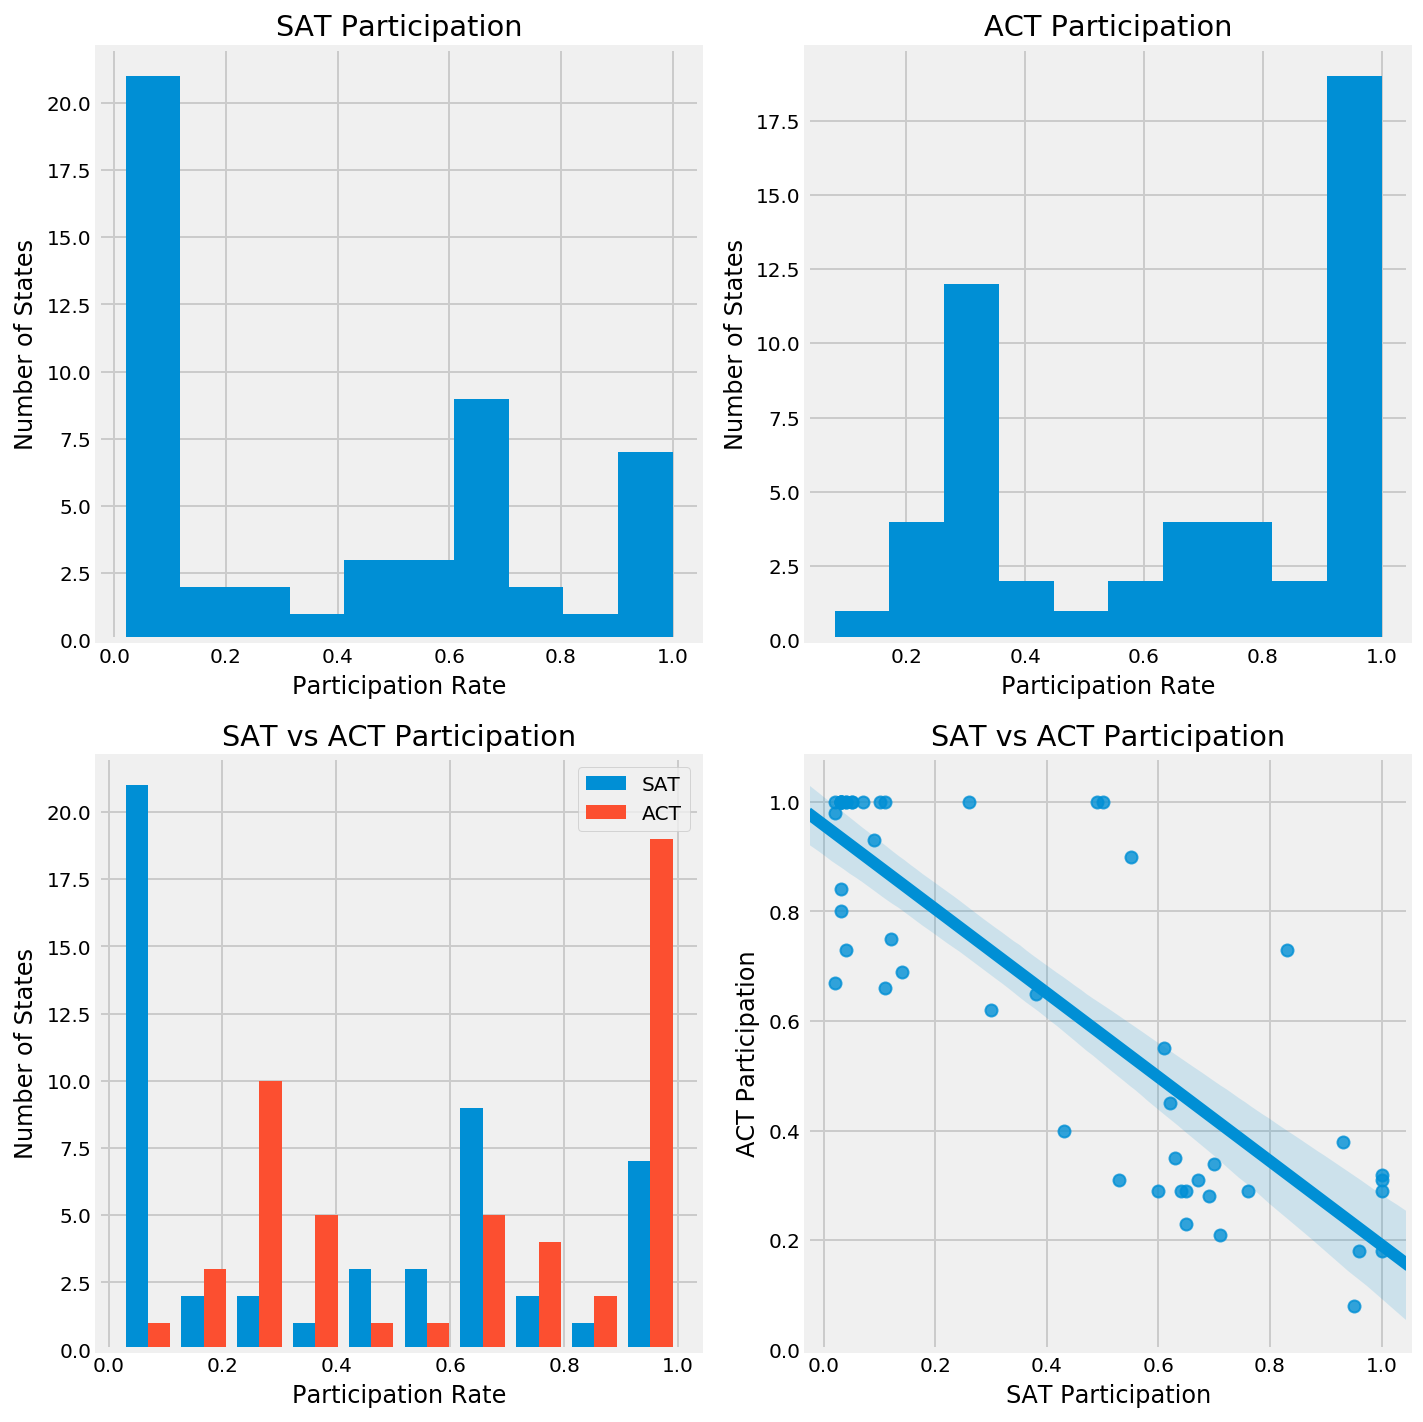

In [31]:
# Initialize the subplot grid and axes 
fig, ax = plt.subplots(2,2,figsize=(10,10))

# Create histograms for the ACT and SAT participation columns 
ax[0,0].hist(combined_tests['SAT Participation']);
ax[0,1].hist(combined_tests['ACT Participation']);

# Combined graph
ax[1,0].hist([combined_tests['SAT Participation'], combined_tests['ACT Participation']])
sns.regplot(combined_tests['SAT Participation'],combined_tests['ACT Participation'], ax = ax[1,1]) ;

# Add Titles and labels 
ax[0,0].set_title("SAT Participation");
ax[0,1].set_title("ACT Participation");
ax[0,0].set_xlabel("Participation Rate");
ax[0,1].set_xlabel("Participation Rate");
ax[0,0].set_ylabel("Number of States");
ax[0,1].set_ylabel("Number of States");
ax[1,0].set_title("SAT vs ACT Participation");
ax[1,0].set_xlabel("Participation Rate");
ax[1,0].set_ylabel("Number of States");
ax[1,0].legend({'SAT':'SAT', 'ACT':'ACT'}, loc = 'best');
ax[1,1].set_title("SAT vs ACT Participation");
ax[1,1].set_xlabel("SAT Participation");
ax[1,1].set_ylabel("ACT Participation");

fig.tight_layout()

It is obvious from the comparison of the distributions that the ACT has a much higher participation rate in more states than the SAT. From the scatter plot comparing both participation rates, we can see that there is a negative linear correlation between the two variables (r = -0.84). This indicates that students are favoring one test over the other in each state. This also makes sense since it is more work (and more expensive) to study for two different types of tests. 

##### 17. Plot the Math(s) distributions from both data sets.

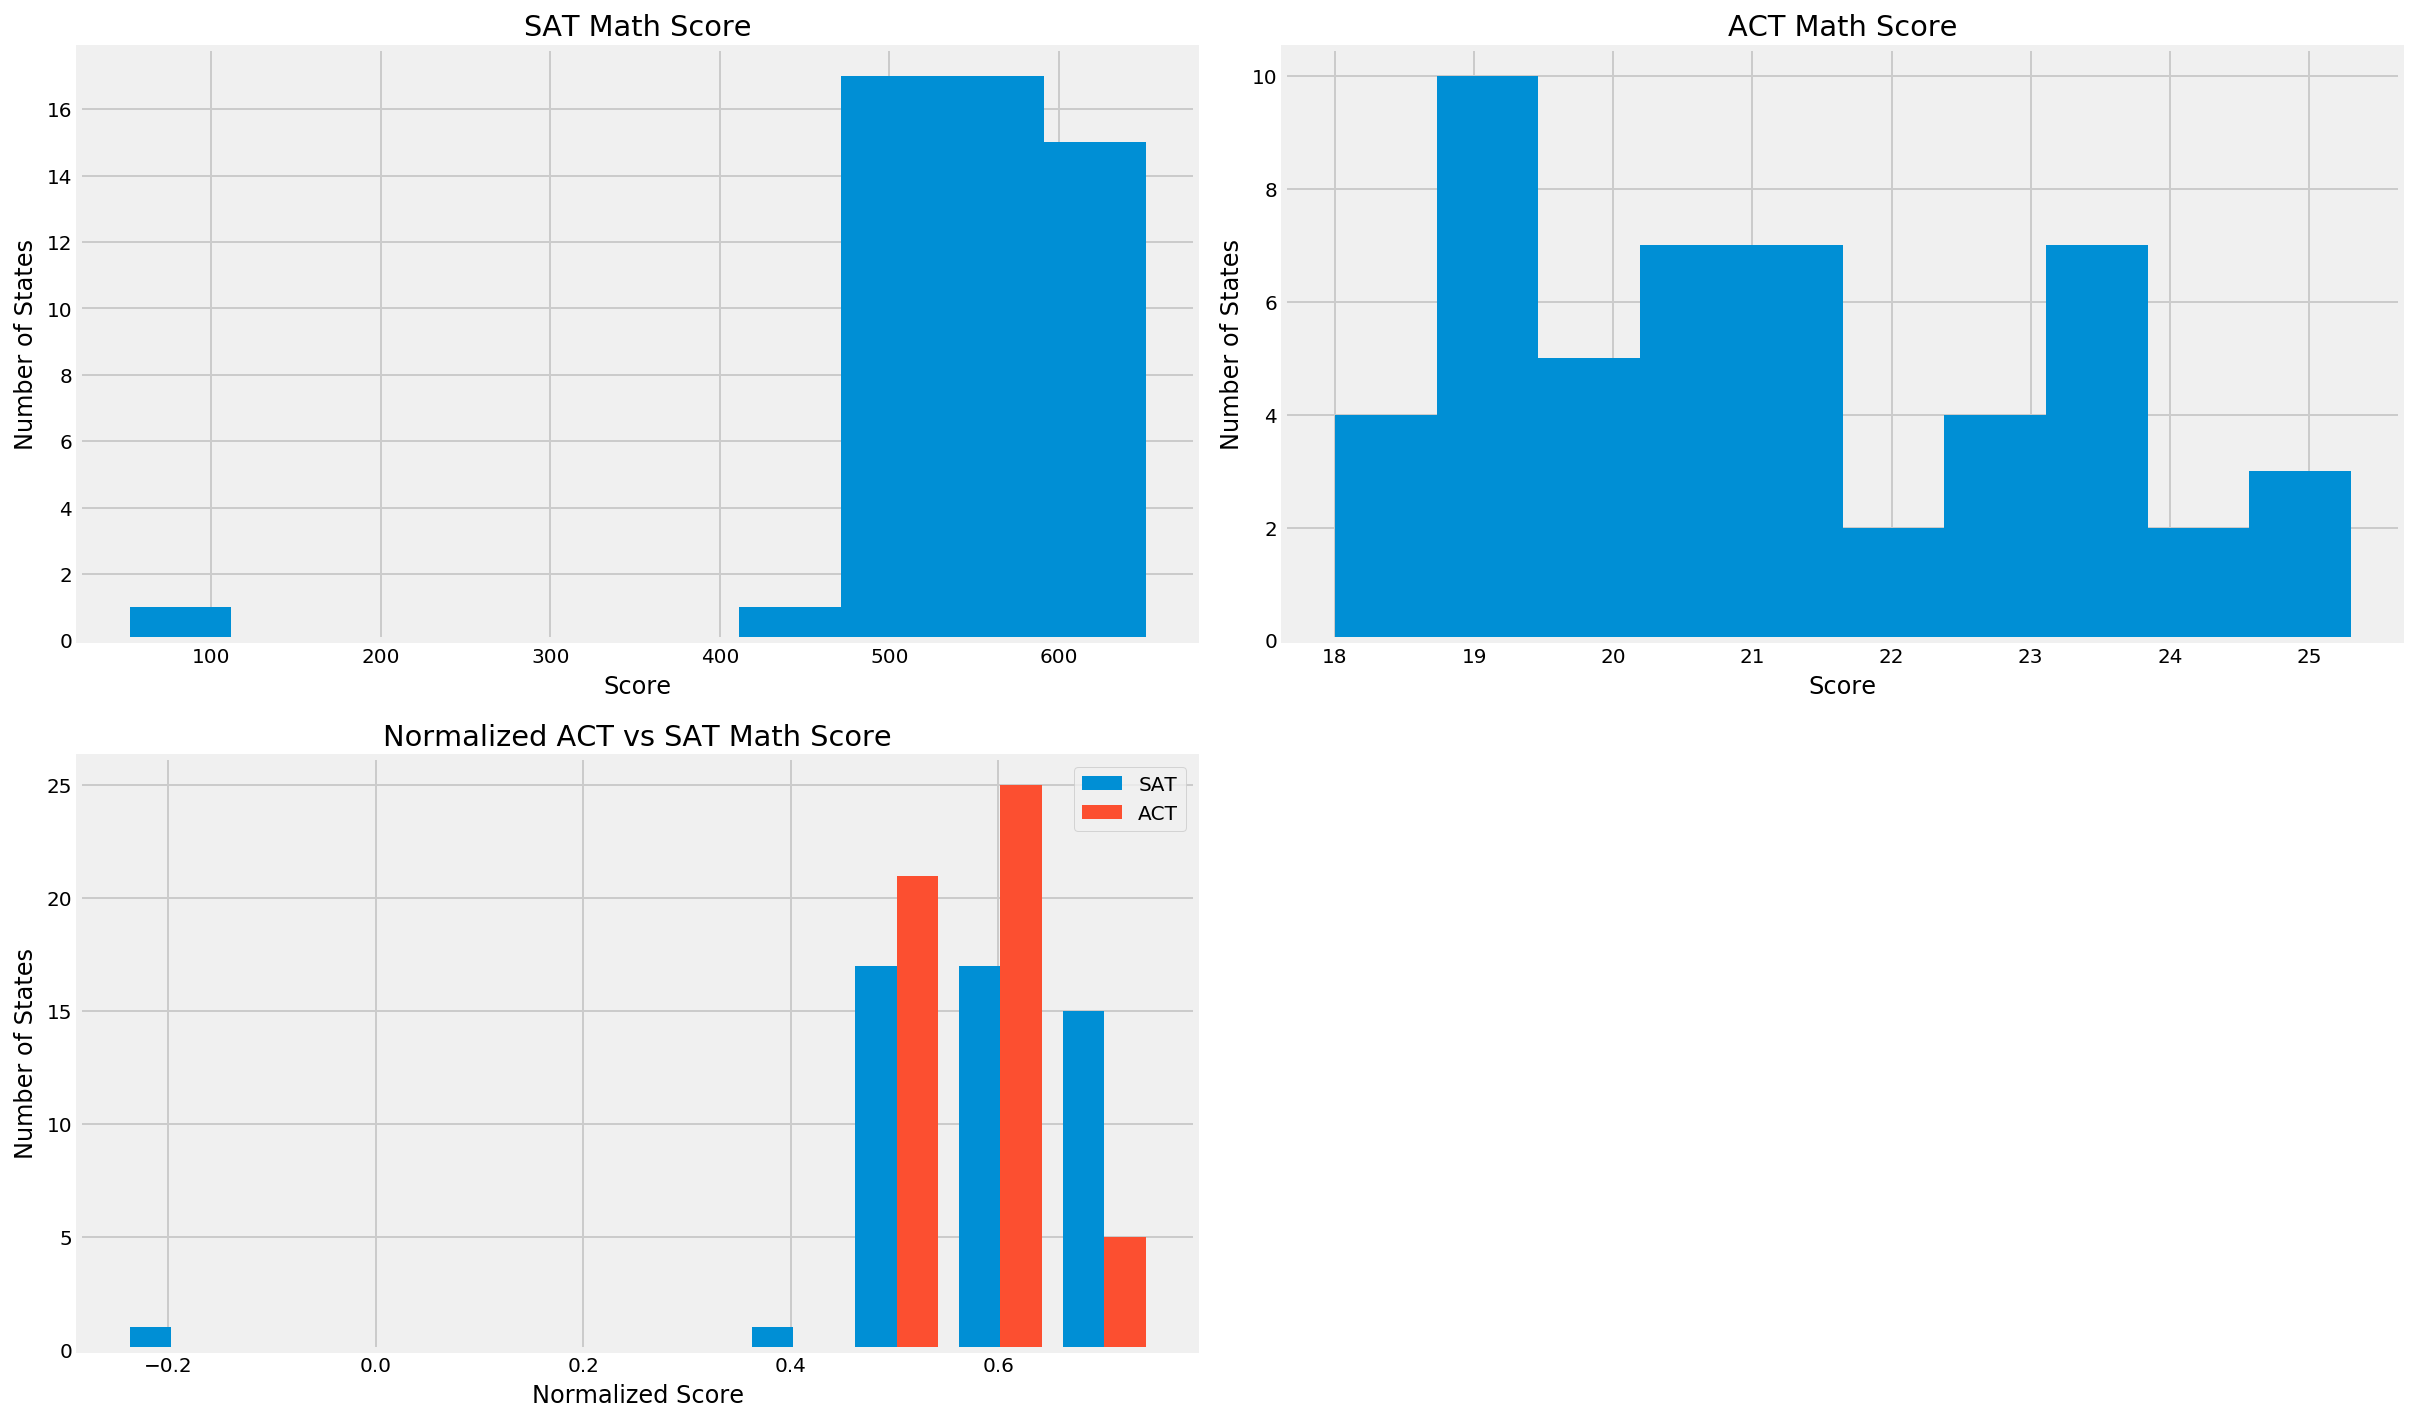

In [32]:
# Initialize the subplot grid and axes 
fig, ax = plt.subplots(2,2,figsize=(17,10))

# Create histograms for the ACT and SAT participation columns 
ax[0,0].hist(combined_tests['SAT Math']);
ax[0,1].hist(combined_tests['ACT Math']);

# Normalized histograms for MATH - lowest math score is 200 on the SAT and 1 and the ACT
ax[1,0].hist([(combined_tests['SAT Math'] - 200)/(800 - 200), (combined_tests['ACT Math'] -1)/(36 -1)])
ax[1,1].axis('off');

# Add Titles and labels 
ax[0,0].set_title("SAT Math Score");
ax[0,1].set_title("ACT Math Score");
ax[0,0].set_xlabel("Score");
ax[0,1].set_xlabel("Score");
ax[0,0].set_ylabel("Number of States");
ax[0,1].set_ylabel("Number of States");
ax[1,0].set_title("Normalized ACT vs SAT Math Score");
ax[1,0].set_xlabel("Normalized Score");
ax[1,0].set_ylabel("Number of States");
ax[1,0].legend({'SAT':'SAT', 'ACT':'ACT'}, loc = 'best')

fig.tight_layout()

From the normalized comparison we can see that more states actually have higher SAT than ACT math scores. We can't definitivly say that students do better on the SAT math than ACT, because we don't have equal partipation rates. The SAT data represents a much lower percentage of the total population and skews on representing high performers only.

We can also see that there is an obvious outlier in the SAT Math section. I identify the outlier below.

In [33]:
# Identify the state with the outlier SAT math score (lowest possible math score is 200)
SAT_outlier = combined_tests[combined_tests["SAT Math"] < 200]
SAT_outlier

,State,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite
20,Maryland,0.69,536.0,52.0,1060.0,0.28,23.3,23.1,24.2,2.3,23.6


Maryland is identified as the outlier with the SAT math score of 52, a score which is not possible on the scoring scale (lowest math score is 200). It is also interesting to note that there seems to be another obvious outlier in the ACT science subject test as well with a very low science score, but a very high composite score.  For both cases it would seem like there were errors when the data was input in the table. I checked both the College Board and ACT official websites to find the real mean scores in 2017 for these subjects and then updated the dataframe with these scores. 

Maryland 2017 - Mean SAT Math score = 524 
https://reports.collegeboard.org/pdf/2017-maryland-sat-suite-assessments-annual-report.pdf

Maryland 2017 - Mean ACT Science score = 23.2 
https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf

In [34]:
# Correct Maryland scores
combined_tests.iloc[20,3] = 524
combined_tests.iloc[20,9] = 23.2

# Check corrections are in dataframe 
combined_tests[combined_tests['State'] == 'Maryland']

,State,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite
20,Maryland,0.69,536.0,524.0,1060.0,0.28,23.3,23.1,24.2,23.2,23.6


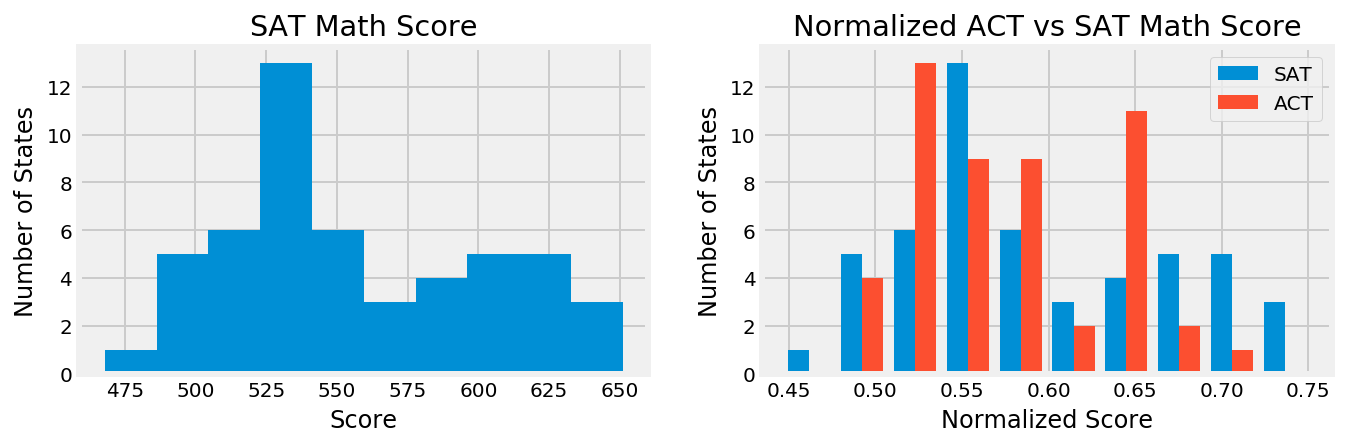

In [35]:
# Update the Math plot with Maryland data corrected 
fig, ax = plt.subplots(1,2, figsize = (10,3))
ax[0].hist(combined_tests['SAT Math'])
ax[1].hist([(combined_tests['SAT Math'] - 200)/(800 - 200), (combined_tests['ACT Math'] -1) /(36-1)])

ax[0].set_title("SAT Math Score");
ax[0].set_xlabel("Score");
ax[0].set_ylabel("Number of States");
ax[1].set_title("Normalized ACT vs SAT Math Score");
ax[1].set_xlabel("Normalized Score");
ax[1].set_ylabel("Number of States");
ax[1].legend({'SAT':'SAT', 'ACT':'ACT'}, loc = 'best');

In [36]:
# Check updated stats for SAT Math and ACT Science 
combined_tests.describe()

,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000


##### 18. Plot the Verbal distributions from both data sets.

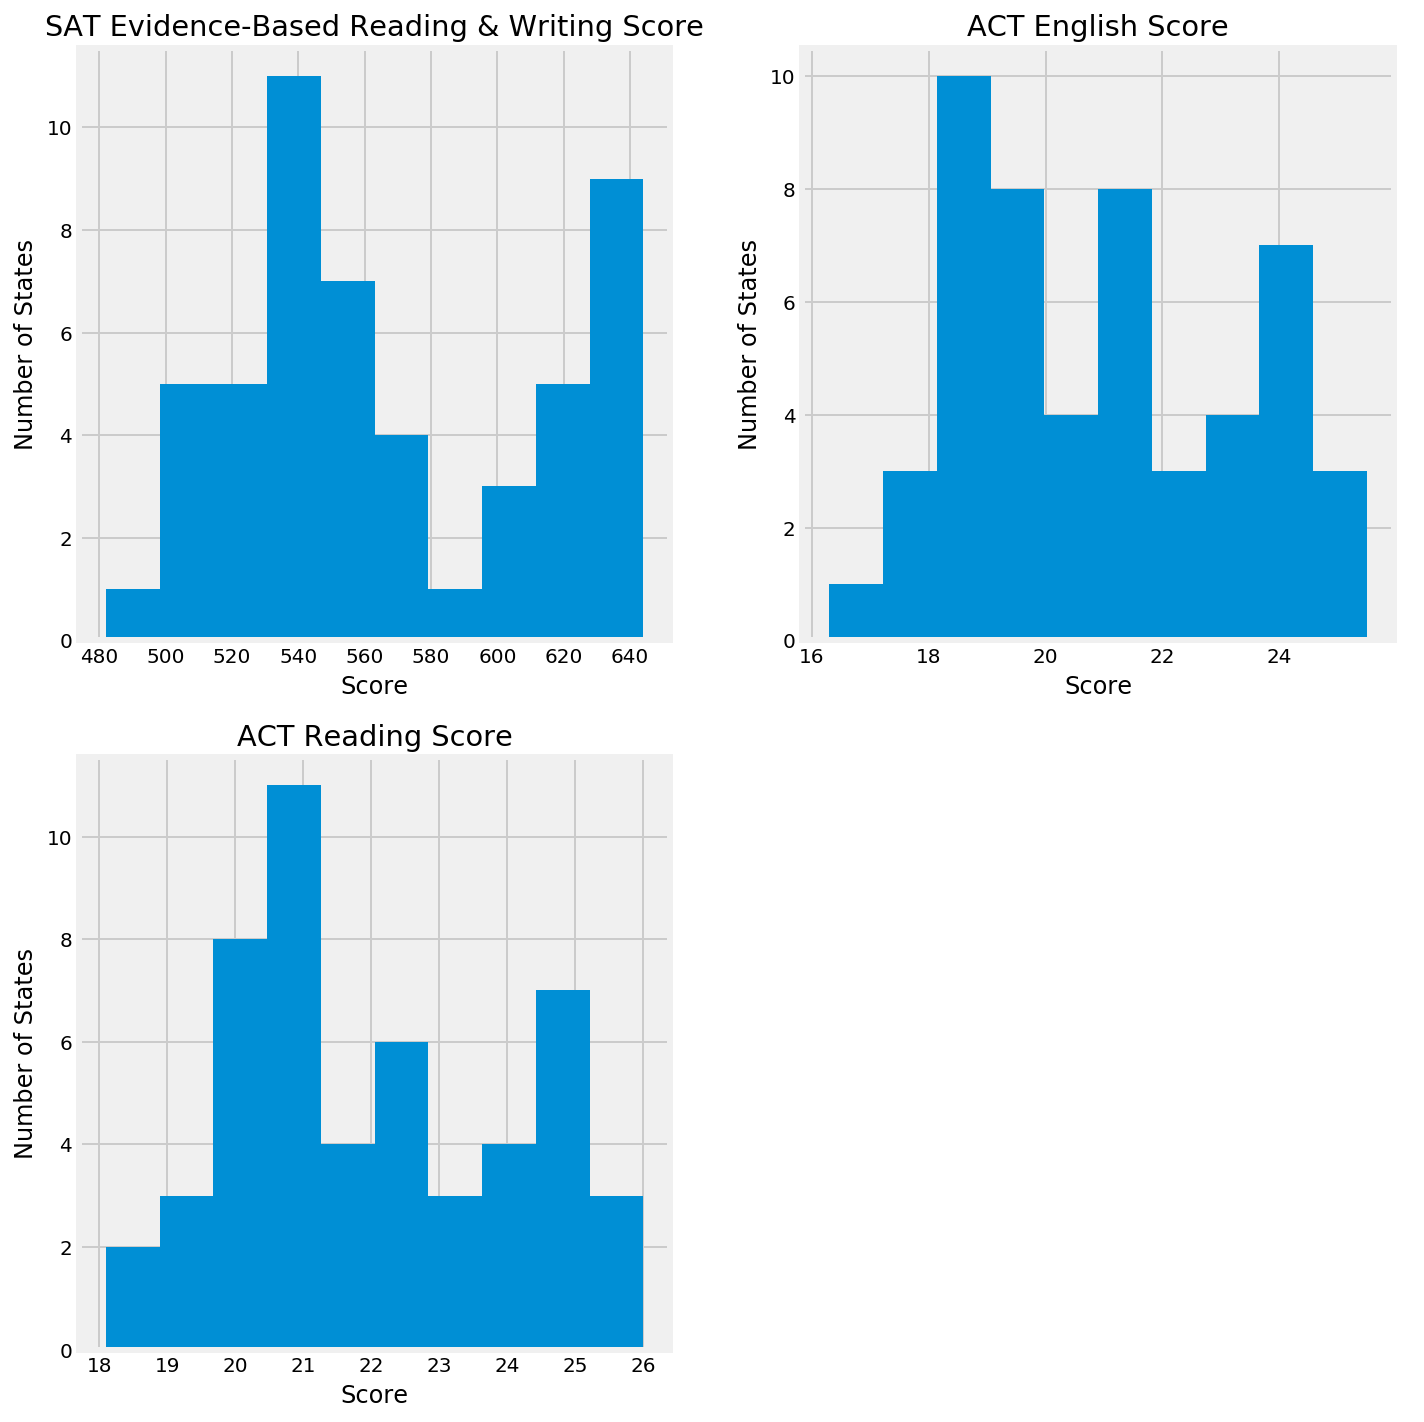

In [37]:
# Initialize the subplot grid and axes 
fig, ax = plt.subplots(2,2,figsize=(10,10))

# Create histograms for the ACT and SAT participation columns 
ax[0,0].hist(combined_tests['SAT Evidence-Based Reading and Writing']);
ax[0,1].hist(combined_tests['ACT English']);
ax[1,0].hist(combined_tests['ACT Reading']);
ax[1,1].axis('off')

# Add Titles and labels 
ax[0,0].set_title("SAT Evidence-Based Reading & Writing Score");
ax[0,1].set_title("ACT English Score");
ax[1,0].set_title("ACT Reading Score");
ax[0,0].set_xlabel("Score");
ax[0,1].set_xlabel("Score");
ax[1,0].set_xlabel("Score");
ax[0,0].set_ylabel("Number of States");
ax[0,1].set_ylabel("Number of States");
ax[1,0].set_ylabel("Number of States");

fig.tight_layout()

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

Common assumptions are usually about normality and that the conditions for normality apply (i.e. Central Limit Theorem). Another assumption is around assuming independence of events. We also assume that the data was collected in an unbiased way.  

##### 20. Does this assumption hold true for any of our columns? Which?

By eye inspection, none of the columns look very normal. In order to confirm, we can run some normal tests and check the p_values using $\alpha$ = 0.05. For this normaility test, the null hypothesis is that the distribution in question is normal. If the p_value < 0.05, then there is sufficient evidence to reject the null hypothesis and conclude that the distribution is NOT normal. 

From the test results below, we can see that SAT Math, ACT English, and ACT Science have a p_value > 0.05. We can conclude that these columns are normal (i.e. there is insufficient evidence to reject the null hypothesis that it is normal). 

In [38]:
# Create a list of the numeric columns we are testing  
numeric_columns = combined_tests.columns[1:]

# Iterate through each column in the dataframe and perform normal and skew tests 
print("Normality test results: \n")
for index in range(len(numeric_columns)):
    normal = stats.normaltest(combined_tests[numeric_columns[index]])
    skewed = stats.skew(combined_tests[numeric_columns[index]])
    print("{}: pvalue = {} and skew = {}".format(numeric_columns[index], normal[-1], skewed), "\n")
    

Normality test results: 

SAT Participation: pvalue = 4.02894334576706e-06 and skew = 0.33617543925343585 

SAT Evidence-Based Reading and Writing: pvalue = 0.0009986795076584 and skew = 0.2646065965076702 

SAT Math: pvalue = 0.056072998982864684 and skew = 0.35421485843432615 

SAT Total: pvalue = 0.008200230814088539 and skew = 0.30168334986069095 

ACT Participation: pvalue = 1.8018419611696658e-16 and skew = -0.19211796242279894 

ACT English: pvalue = 0.08434764489205682 and skew = 0.34220217359811805 

ACT Math: pvalue = 0.03786805958606832 and skew = 0.3228174361152988 

ACT Reading: pvalue = 0.04396683079879635 and skew = 0.2613779187300745 

ACT Science: pvalue = 0.0638854744336635 and skew = 0.21233390930923077 

ACT Composite: pvalue = 0.03767739587231253 and skew = 0.3103255637098951 



##### 21. Plot some scatterplots examining relationships between all variables.

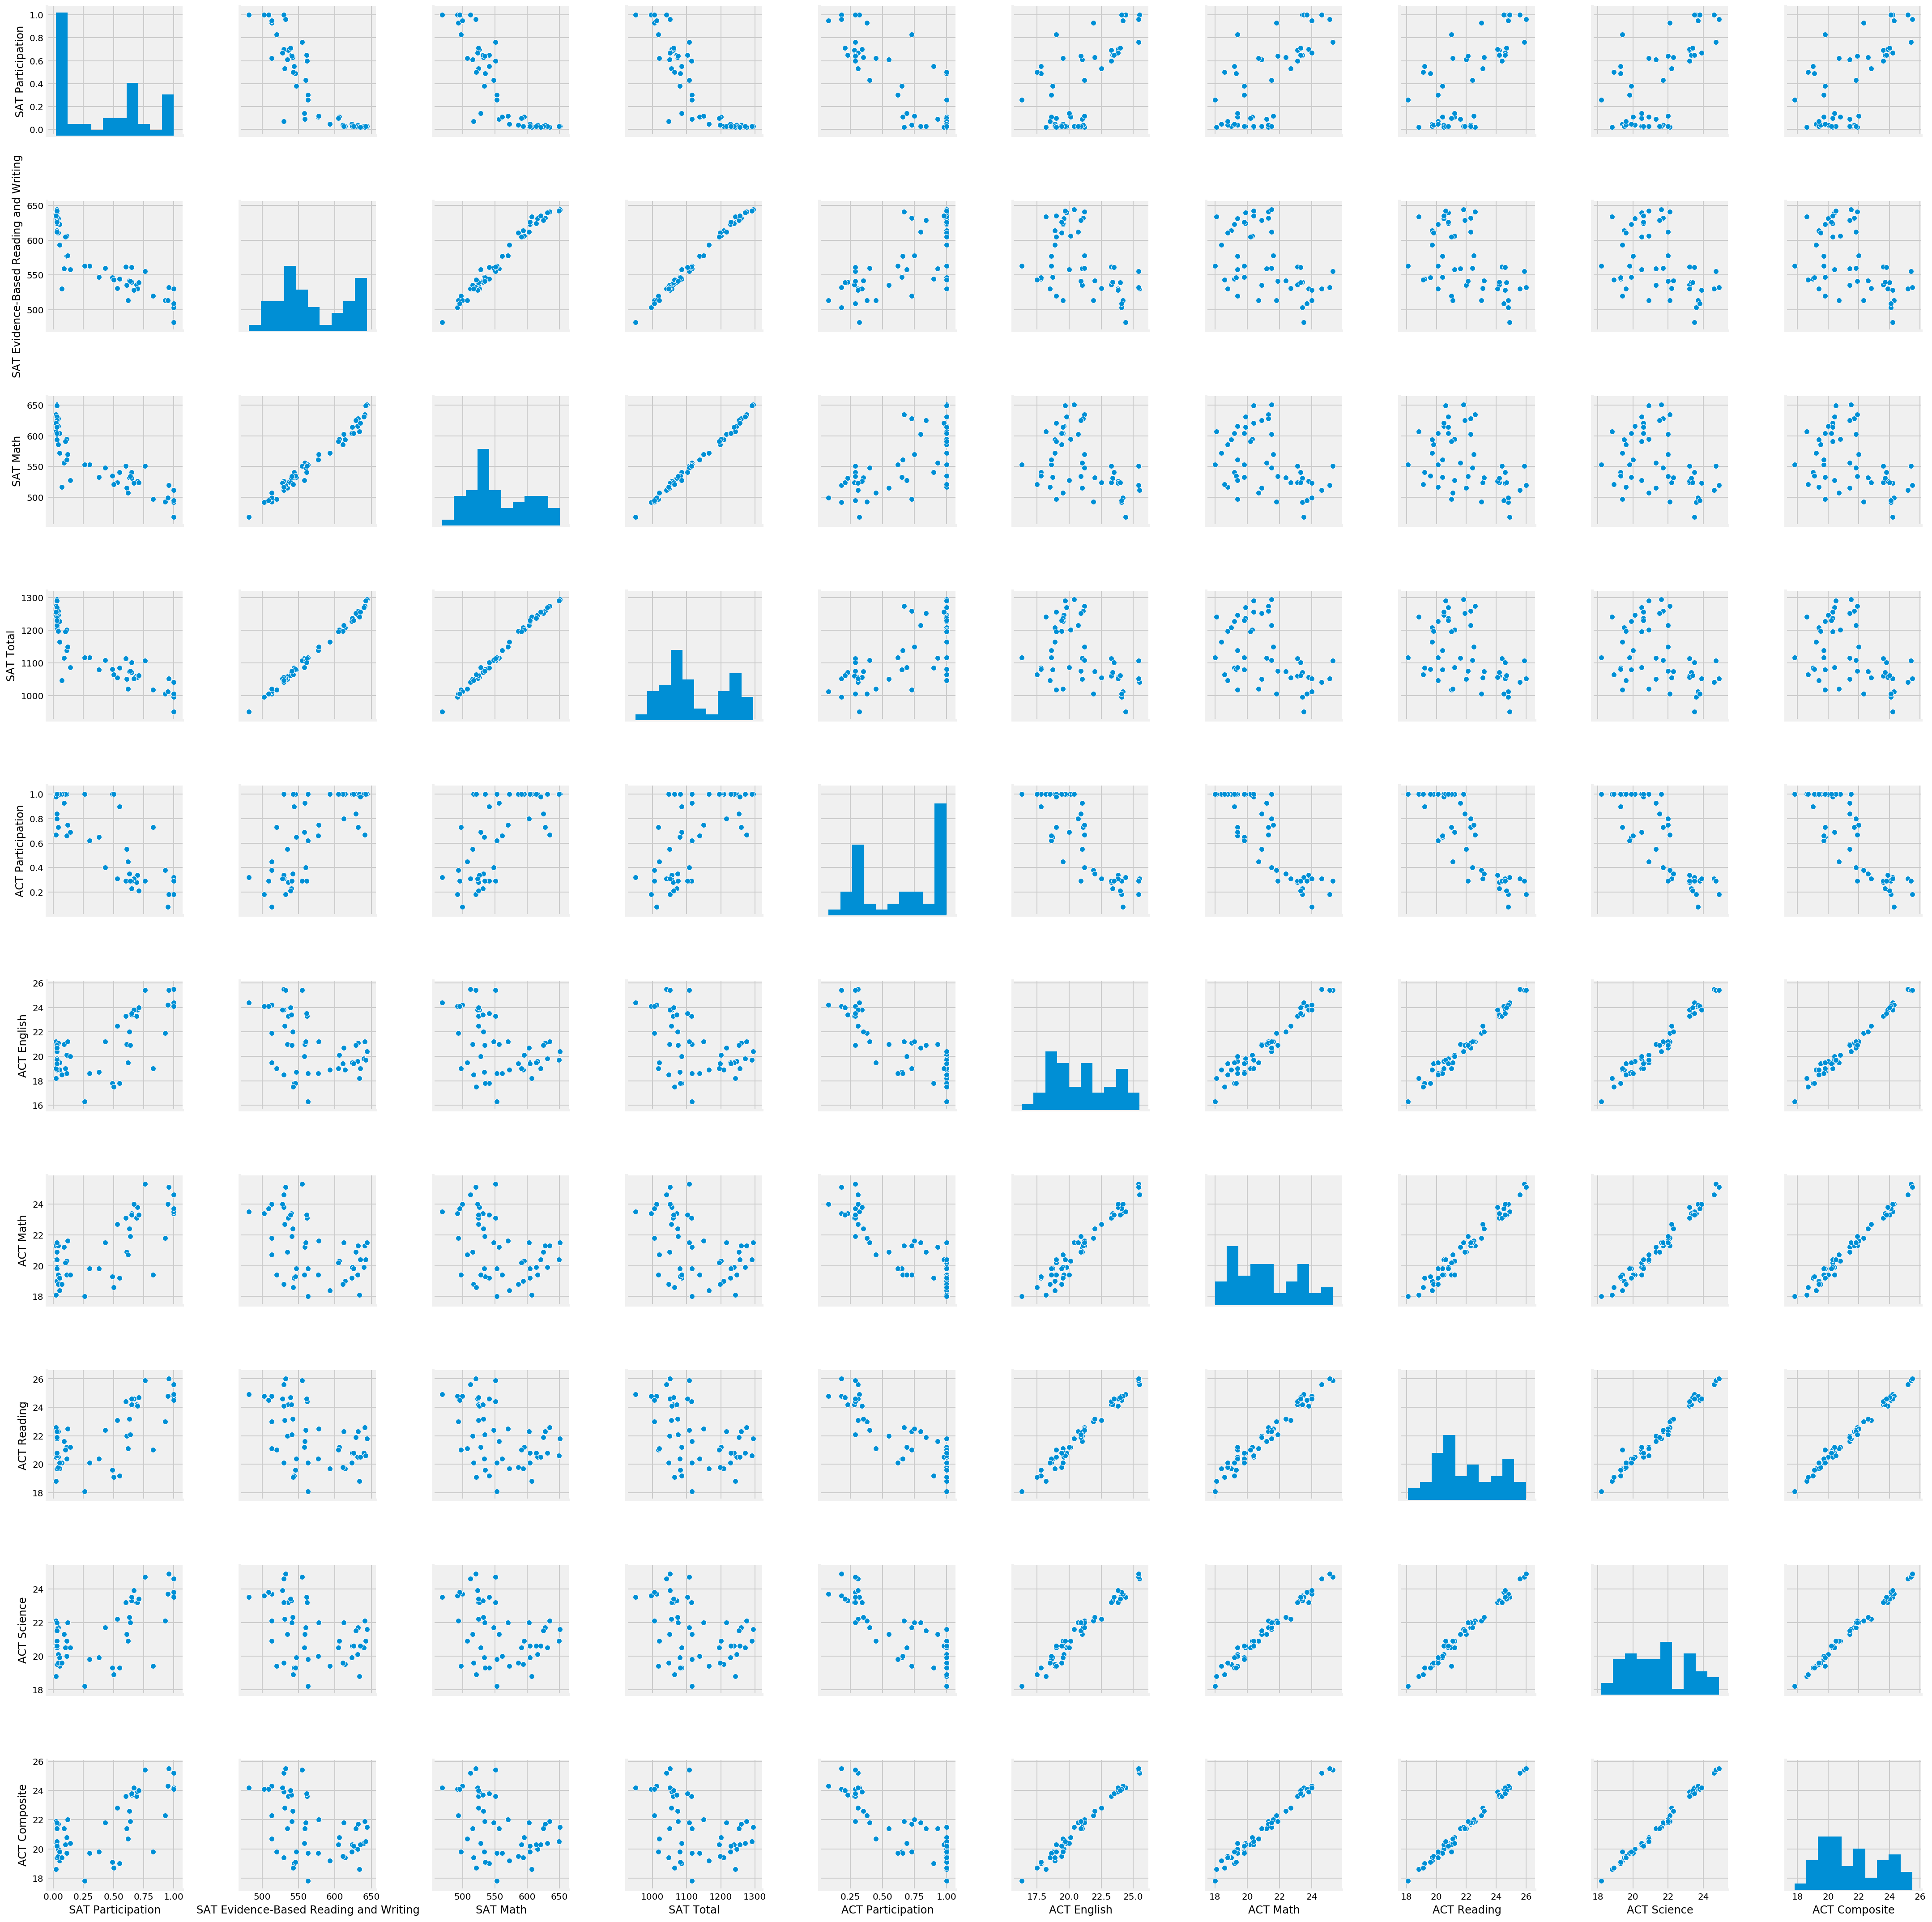

In [39]:
# Pairplot to examine relationships b/w all variables -- this is to get a general idea of which variables to compare
# Not all relationships will make sense to compare (namely those that have not been normalized)
sns.pairplot(combined_tests, vars= numeric_columns, size = 3);

In [40]:
# Investigate correlations 
combined_tests.corr()

,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite
SAT Participation,1.000000,-0.874326,-0.855091,-0.867540,-0.841234,0.686889,0.710697,0.705352,0.653670,0.694748
SAT Evidence-Based Reading and Writing,-0.874326,1.000000,0.987056,0.996661,0.716153,-0.461345,-0.486126,-0.488441,-0.422130,-0.470382
SAT Math,-0.855091,0.987056,1.000000,0.996822,0.682572,-0.420673,-0.420456,-0.442410,-0.365515,-0.417817
SAT Total,-0.867540,0.996661,0.996822,1.000000,0.701477,-0.441947,-0.454116,-0.466558,-0.394559,-0.445020
ACT Participation,-0.841234,0.716153,0.682572,0.701477,1.000000,-0.843501,-0.861114,-0.866620,-0.836595,-0.858134
ACT English,0.686889,-0.461345,-0.420673,-0.441947,-0.843501,1.000000,0.967803,0.985999,0.980042,0.990856
ACT Math,0.710697,-0.486126,-0.420456,-0.454116,-0.861114,0.967803,1.000000,0.979630,0.986929,0.990451
ACT Reading,0.705352,-0.488441,-0.442410,-0.466558,-0.866620,0.985999,0.979630,1.000000,0.988034,0.995069
ACT Science,0.653670,-0.422130,-0.365515,-0.394559,-0.836595,0.980042,0.986929,0.988034,1.000000,0.995129
ACT Composite,0.694748,-0.470382,-0.417817,-0.445020,-0.858134,0.990856,0.990451,0.995069,0.995129,1.000000


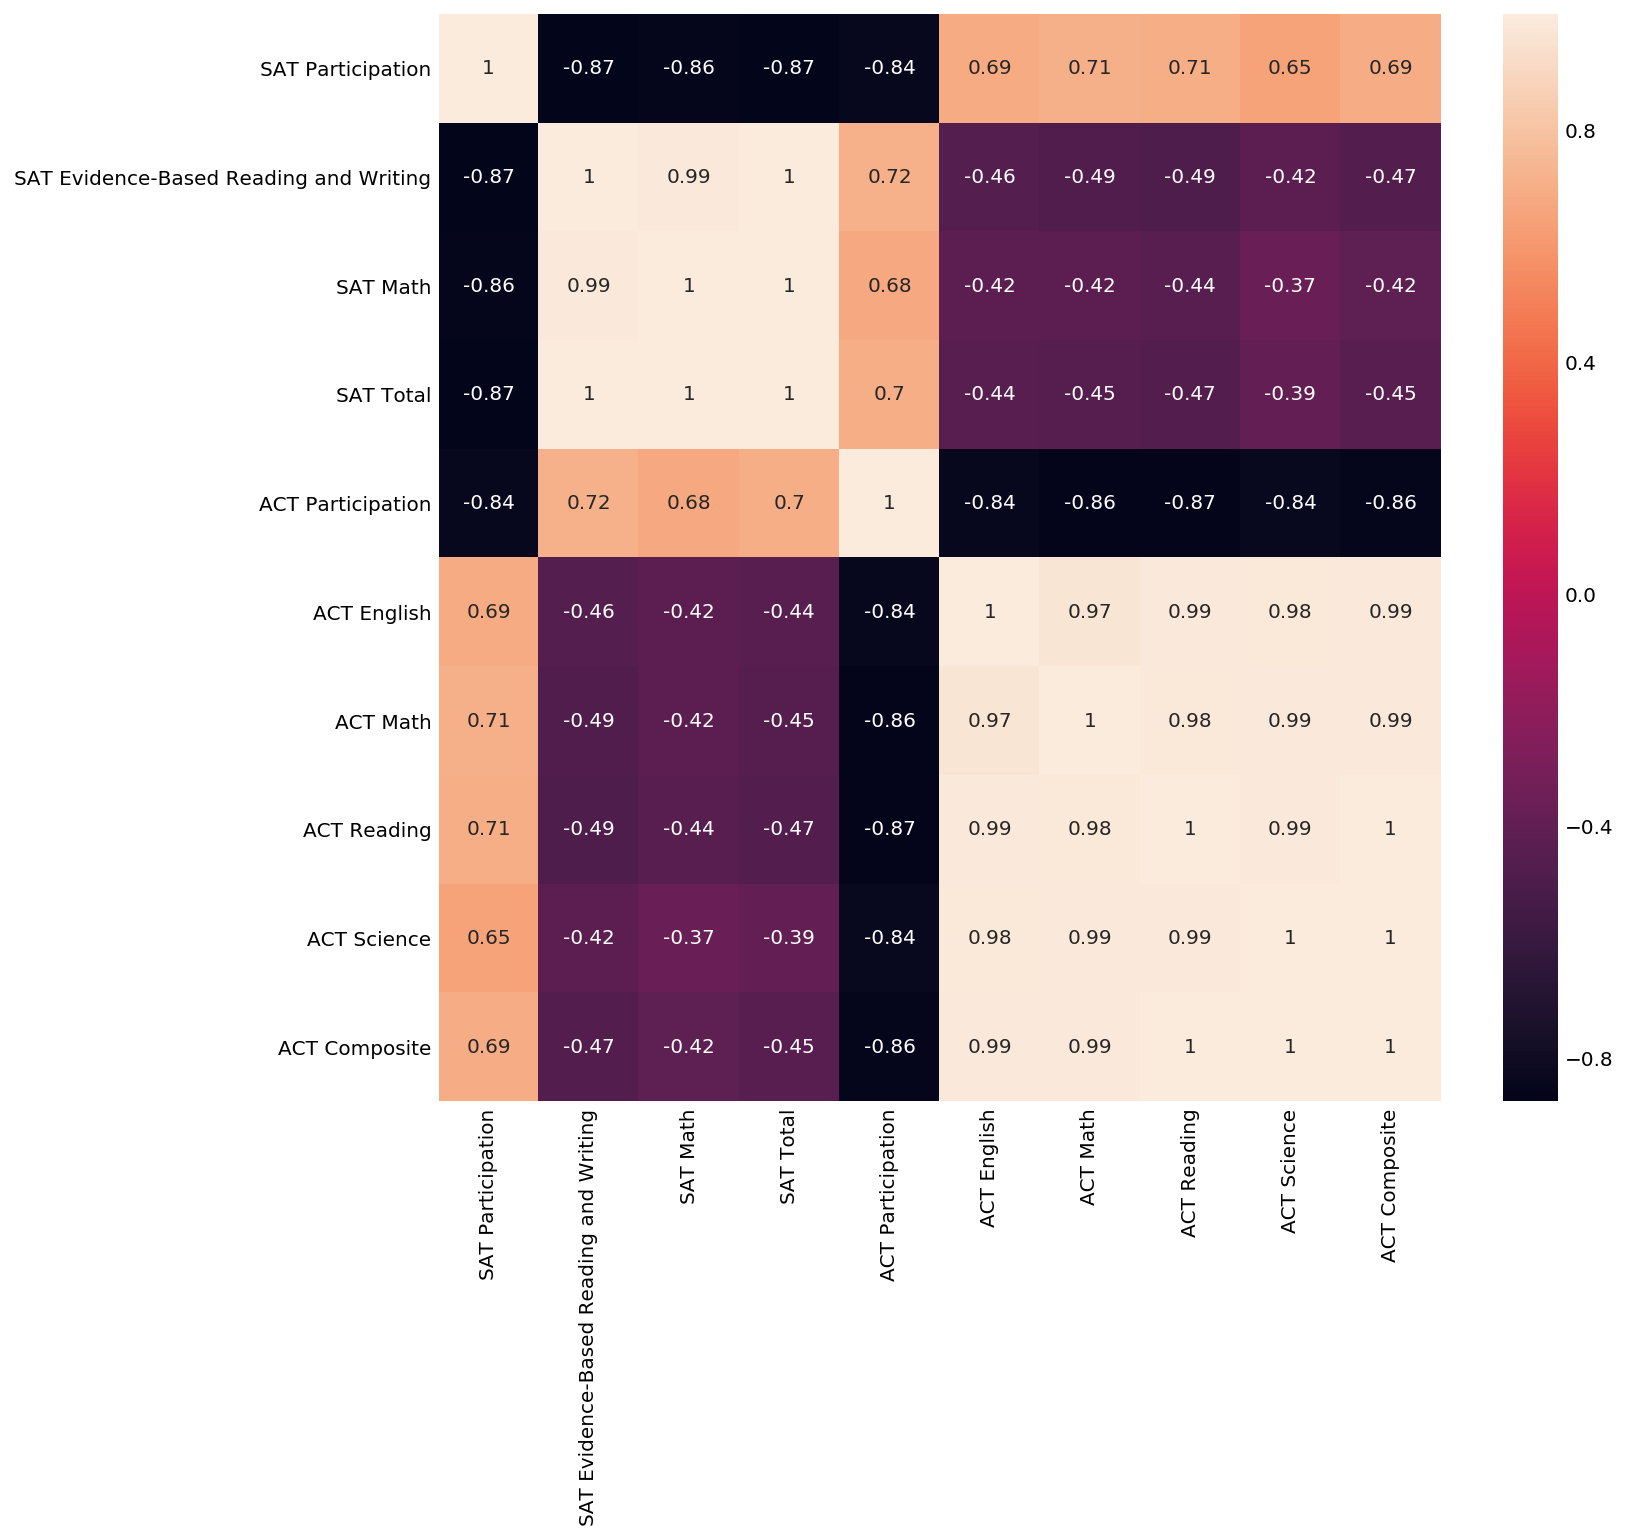

In [41]:
# Visual representation of the correlation between variables 
plt.figure(figsize = (10,10))
sns.heatmap(combined_tests.corr(), annot = True);

The heatmap also confirms the previous analysis. There is a strong positive linear correlation between the ACT and SAT subjects and their total scores. There is also a negative linear relationship between participation rates r = -0.84

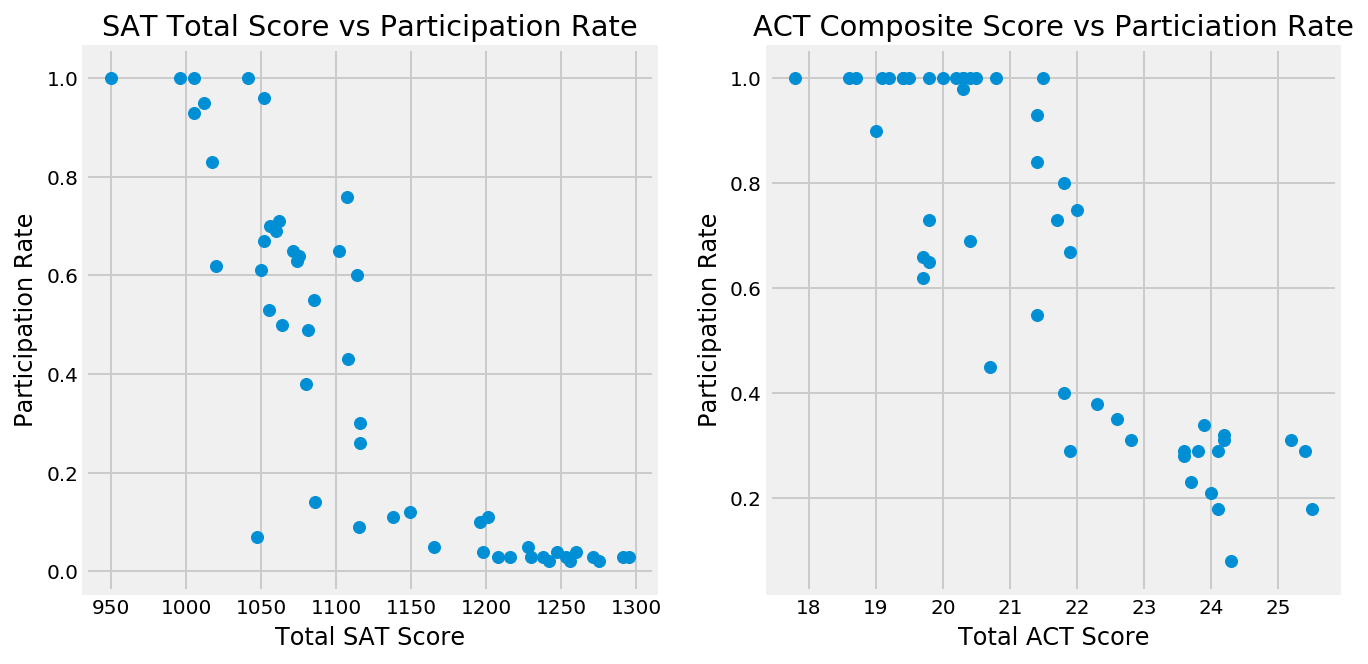

In [42]:
# Participation Rates vs total score
fig,ax = plt.subplots(1,2, figsize = (10,5));
ax[0].scatter(combined_tests['SAT Total'], combined_tests['SAT Participation']);
ax[1].scatter(combined_tests['ACT Composite'], combined_tests['ACT Participation']);

# Add title and labels 
ax[0].set_xlabel('Total SAT Score')
ax[1].set_xlabel('Total ACT Score')
ax[0].set_ylabel('Participation Rate')
ax[1].set_ylabel('Participation Rate')
ax[0].set_title('SAT Total Score vs Participation Rate')
ax[1].set_title('ACT Composite Score vs Particiation Rate');

For both tests, the higher participation rates result in a lower mean score for the state. This makes sense since they are capturing the whole eligble population, eliminating bias. The lower participation rates might have higher mean scores since motivated students, students who are going to do well on the test, are being disproportionately represented. 

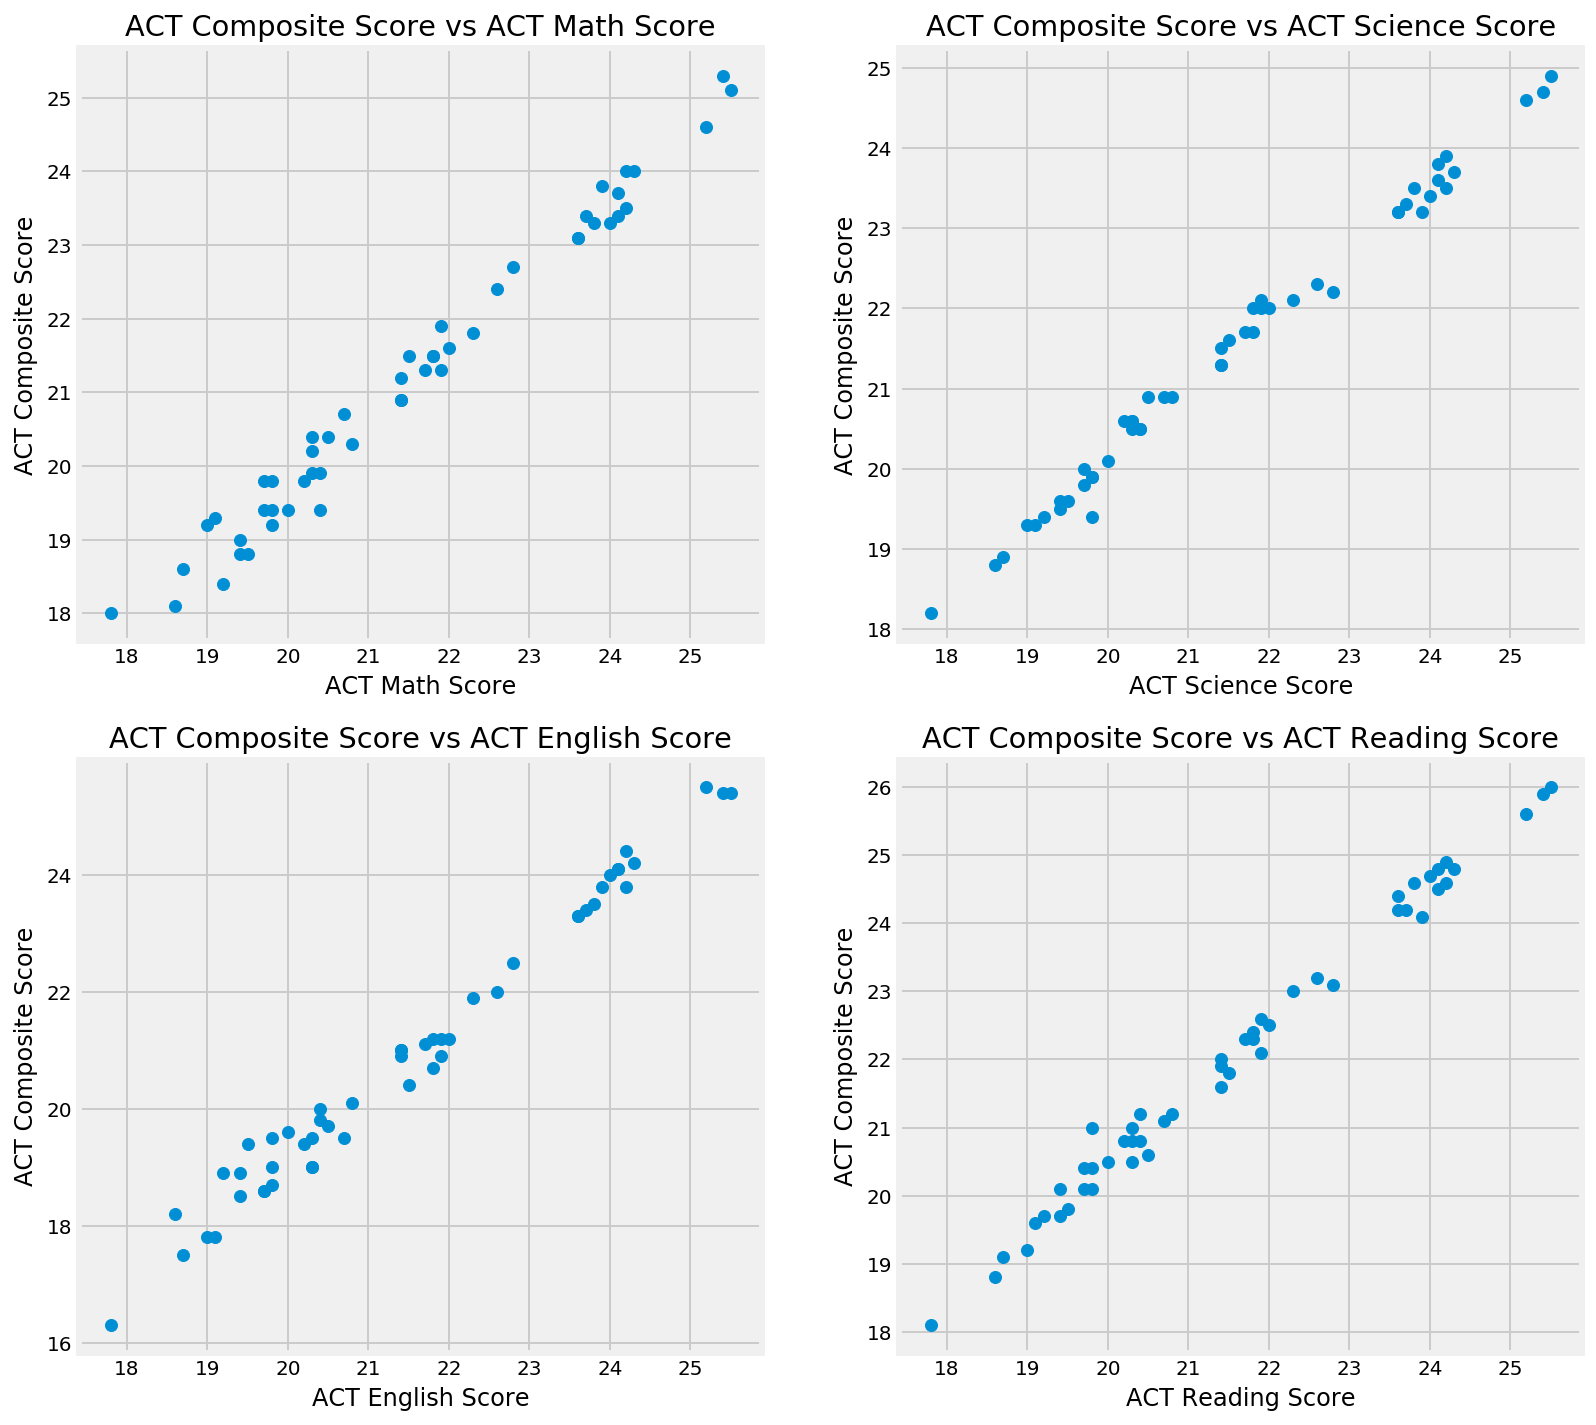

In [43]:
# Compare ACT Composite scores with subjects 
fig,ax = plt.subplots(2,2, figsize = (12,12));
ax[0,0].scatter(combined_tests['ACT Composite'], combined_tests['ACT Math']);
ax[0,1].scatter(combined_tests['ACT Composite'], combined_tests['ACT Science']);
ax[1,0].scatter(combined_tests['ACT Composite'], combined_tests['ACT English']);
ax[1,1].scatter(combined_tests['ACT Composite'], combined_tests['ACT Reading']);

# Add title and labels 
ax[0,0].set_xlabel('ACT Math Score')
ax[0,1].set_xlabel('ACT Science Score')
ax[0,0].set_ylabel('ACT Composite Score')
ax[0,1].set_ylabel('ACT Composite Score')
ax[0,0].set_title('ACT Composite Score vs ACT Math Score')
ax[0,1].set_title('ACT Composite Score vs ACT Science Score');
ax[1,0].set_xlabel('ACT English Score')
ax[1,1].set_xlabel('ACT Reading Score')
ax[1,0].set_ylabel('ACT Composite Score')
ax[1,1].set_ylabel('ACT Composite Score')
ax[1,0].set_title('ACT Composite Score vs ACT English Score')
ax[1,1].set_title('ACT Composite Score vs ACT Reading Score');

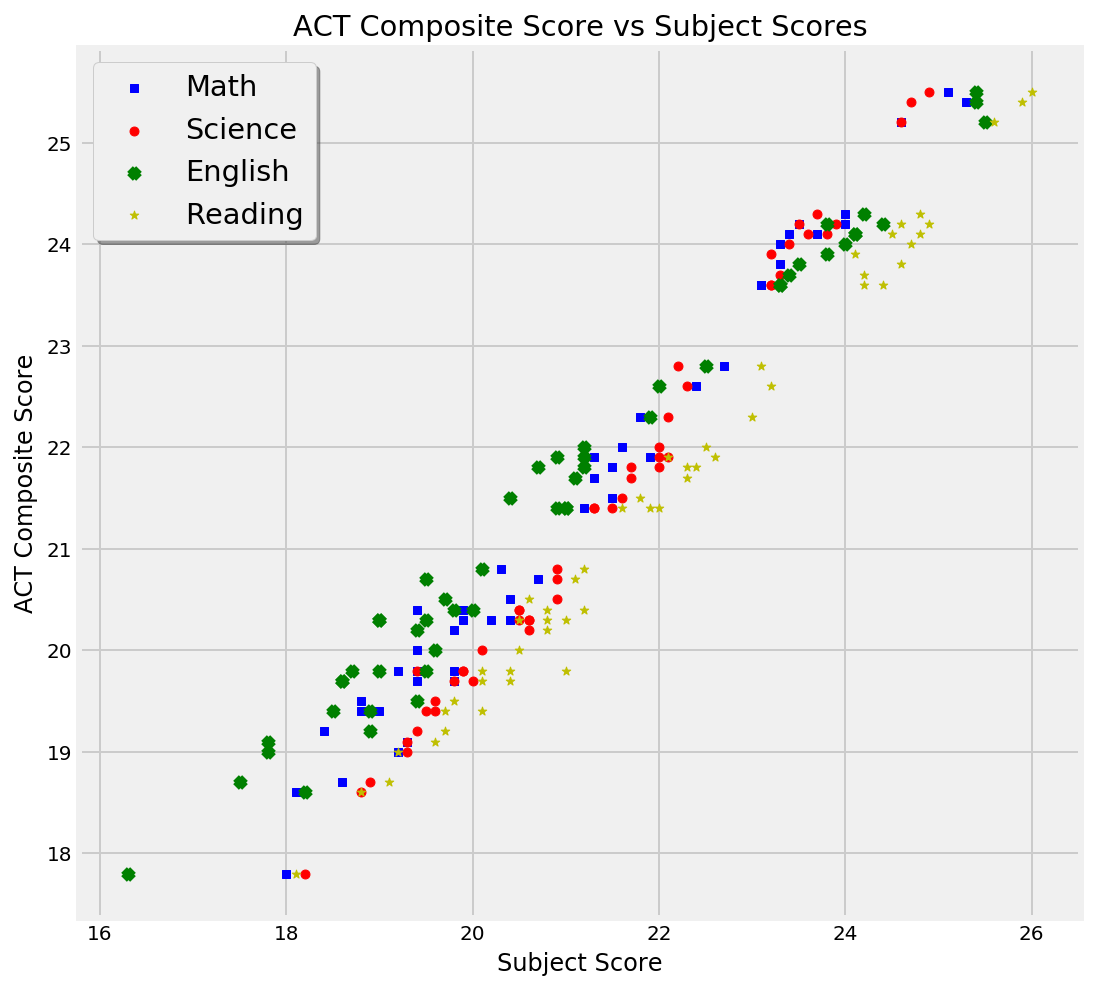

In [44]:
# Previous 4 graphs on the same plot
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)

# Load data into scatter points of differing color and shape to identify different subject scores 
ax1.scatter(combined_tests['ACT Math'], combined_tests['ACT Composite'], s=20, c='b', marker="s", label='Math')
ax1.scatter(combined_tests['ACT Science'],combined_tests['ACT Composite'], s=20, c='r', marker="o", label='Science')
ax1.scatter(combined_tests['ACT English'], combined_tests['ACT Composite'], s=20, c='g', marker="x", label='English')
ax1.scatter(combined_tests['ACT Reading'],combined_tests['ACT Composite'], s=20, c='y', marker="*", label='Reading')

# Create legend and labels 
plt.legend(loc='best', ncol=1, shadow=True, fancybox=True, fontsize = 'x-large');
ax1.set_title("ACT Composite Score vs Subject Scores")
ax1.set_xlabel("Subject Score")
ax1.set_ylabel("ACT Composite Score");

As expected, when we compare the overall ACT Composite score vs the subject tests, there is a positive linear correlation. States with students with higher mean subject scores will also have higher composite scores since the subject scores contribute to the composite score. When we graph all the subjects on the same plot, we see that states typically have higher mean reading scores than the other subjects. 

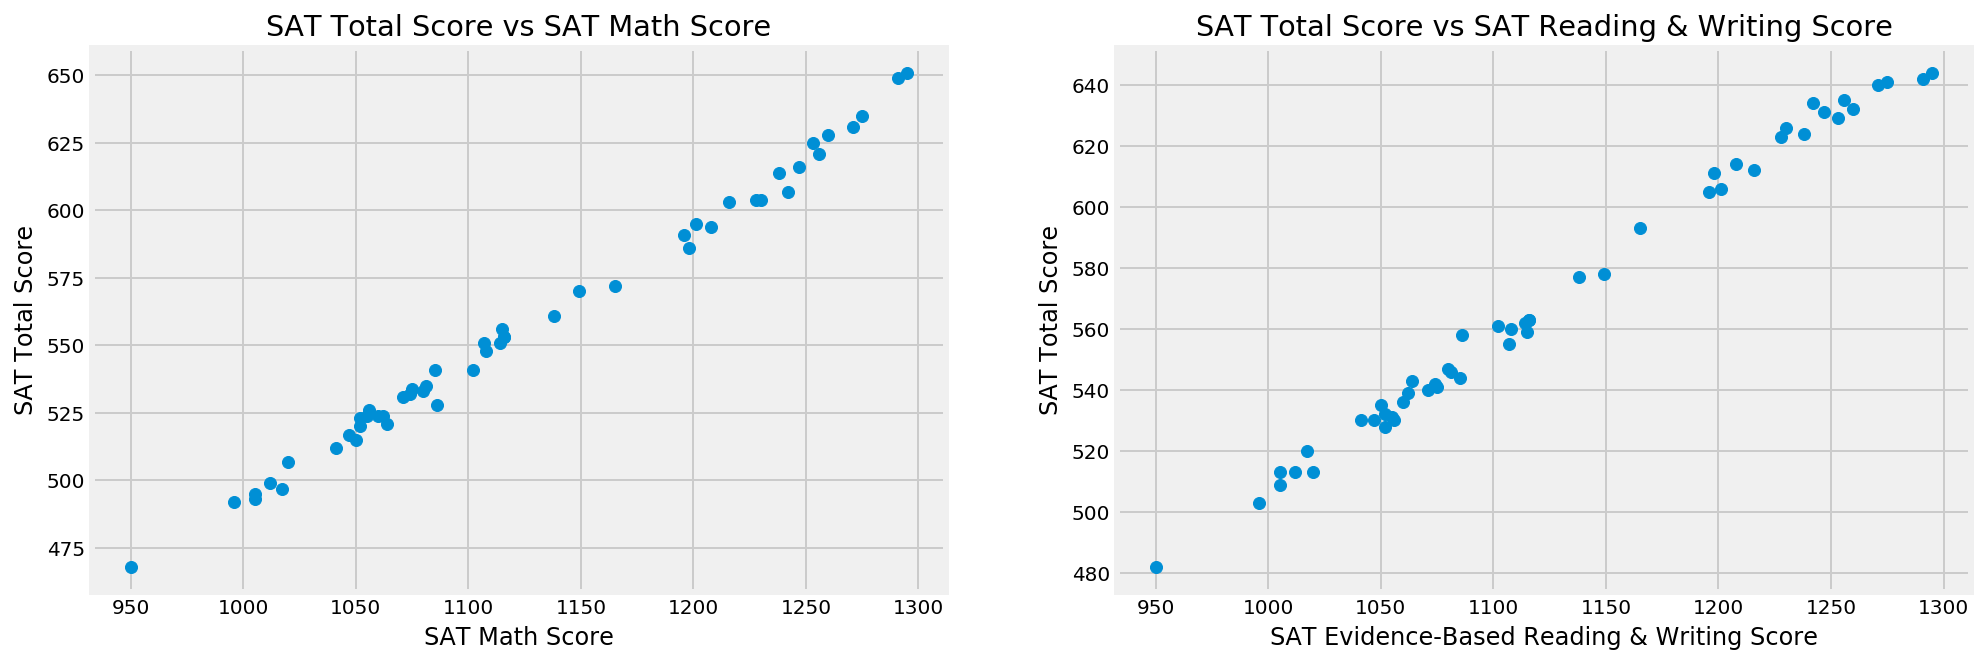

In [45]:
# Compare SAT Total scores with subjects 
fig,ax = plt.subplots(1,2, figsize = (15,5));
ax[0].scatter(combined_tests['SAT Total'], combined_tests['SAT Math']);
ax[1].scatter(combined_tests['SAT Total'], combined_tests['SAT Evidence-Based Reading and Writing']);


# Add title and labels 
ax[0].set_xlabel('SAT Math Score')
ax[1].set_xlabel('SAT Evidence-Based Reading & Writing Score')
ax[0].set_ylabel('SAT Total Score')
ax[1].set_ylabel('SAT Total Score')
ax[0].set_title('SAT Total Score vs SAT Math Score')
ax[1].set_title('SAT Total Score vs SAT Reading & Writing Score');


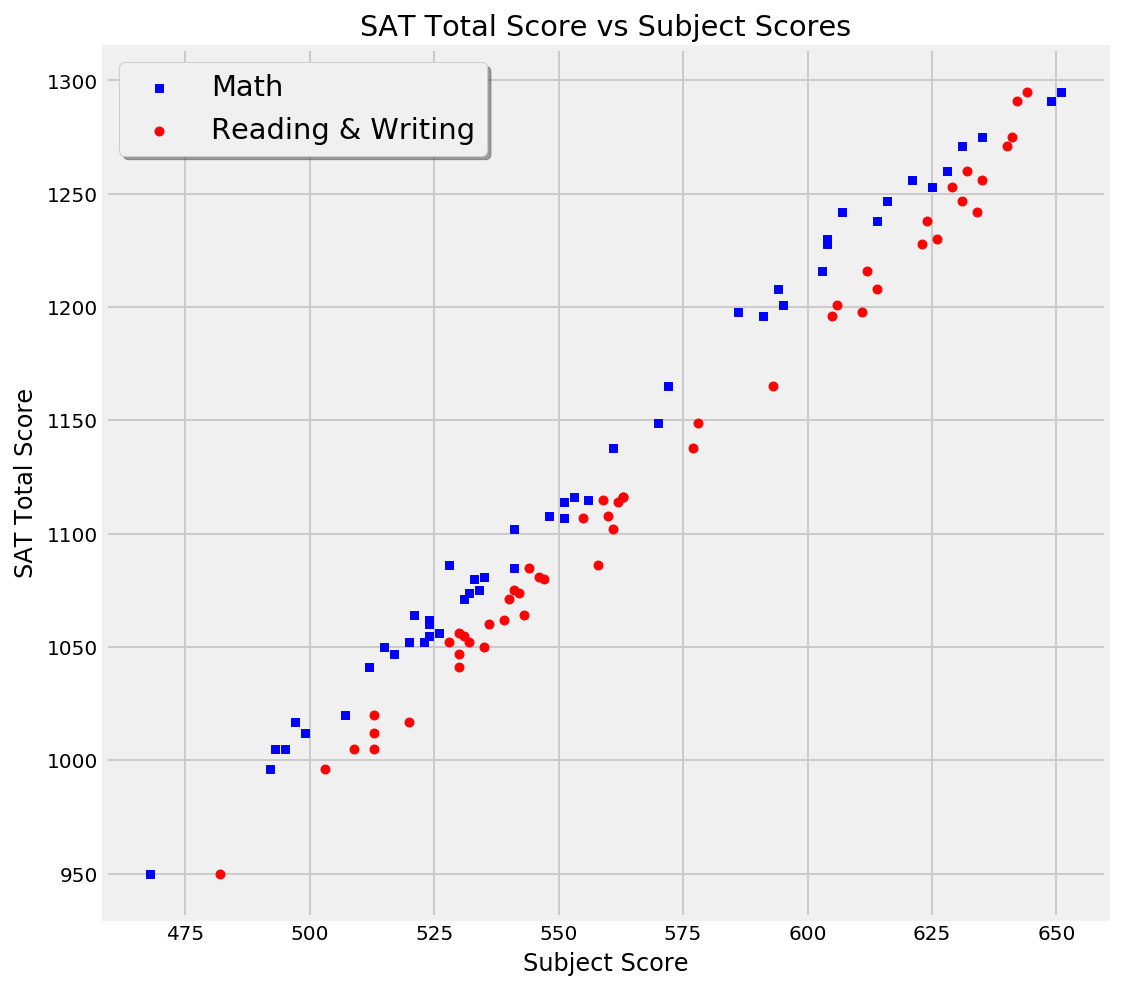

In [46]:
# Previous 2 graphs on the same plot
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)

# Load data into scatter points of differing color and shape to identify different subject scores 
ax1.scatter(combined_tests['SAT Math'], combined_tests['SAT Total'], s=20, c='b', marker="s", label='Math')
ax1.scatter(combined_tests['SAT Evidence-Based Reading and Writing'],combined_tests['SAT Total'], s=20, c='r', marker="o", label='Reading & Writing')

# Create legend and labels 
plt.legend(loc='best', ncol=1, shadow=True, fancybox=True, fontsize = 'x-large');
ax1.set_title("SAT Total Score vs Subject Scores")
ax1.set_xlabel("Subject Score")
ax1.set_ylabel("SAT Total Score");

Again as expected, when we compare the overall SAT Total score vs the subject tests, there is a positive linear correlation. States with students with higher mean subject scores will also have higher total scores since the subject scores contribute to the total score. When we graph all the subjects on the same plot, we see that states typically have higher mean reading & writing scores than math. 

##### 22. Are there any interesting relationships to note?

Besides the relationships I have noted above, it is important to note that not all of the variable comparisons are going to make sense since we can't compare SAT vs ACT scores. The two tests are on different scoring scales and our data is not normalized to make these particular comparisons. 

Out of curiosity, I have normalized the total scores below in order to compare them. 

In [47]:
# Normalize total ACT and SAT scores -- the ACT is out of 36 and the SAT 1600 - lowest SAT score is 400, ACT is 1
norm_tests = combined_tests
norm_tests['SAT Total Normalized'] = (norm_tests['SAT Total'] - 400) / (1600 - 400)
norm_tests['ACT Composite Normalized'] = (norm_tests['ACT Composite'] -1) / (36 - 1)
norm_tests.head()

,State,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite,SAT Total Normalized,ACT Composite Normalized
0,Alabama,0.05,593.0,572.0,1165.0,1.00,18.9,18.4,19.7,19.4,19.2,0.637500,0.520000
1,Alaska,0.38,547.0,533.0,1080.0,0.65,18.7,19.8,20.4,19.9,19.8,0.566667,0.537143
2,Arizona,0.30,563.0,553.0,1116.0,0.62,18.6,19.8,20.1,19.8,19.7,0.596667,0.534286
3,Arkansas,0.03,614.0,594.0,1208.0,1.00,18.9,19.0,19.7,19.5,19.4,0.673333,0.525714
4,California,0.53,531.0,524.0,1055.0,0.31,22.5,22.7,23.1,22.2,22.8,0.545833,0.622857


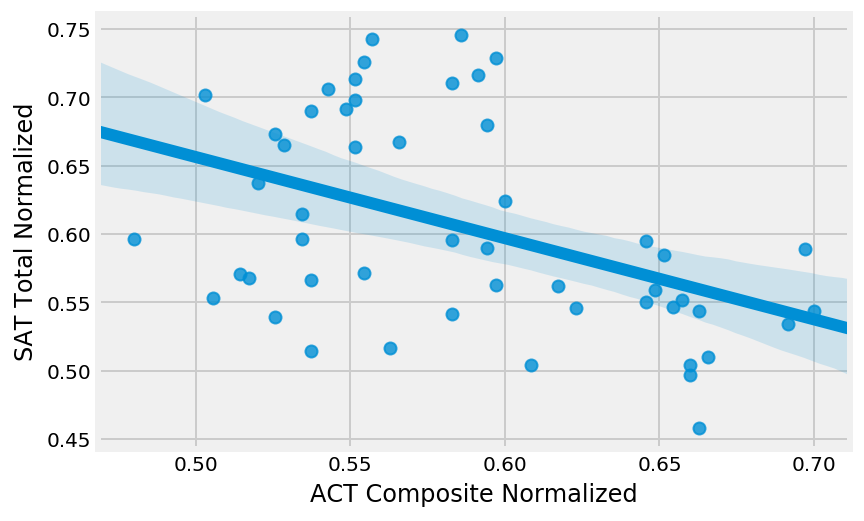

In [48]:
# Plot the normalized ACT vs SAT scores, there appears to be a slight negative linear correlation 
sns.regplot(norm_tests['ACT Composite Normalized'],norm_tests['SAT Total Normalized']);

In [49]:
# Now plot test comparison for only states with similar test participation rates to avoid potential bias in 
# states with low participation rate but high scores 
below = norm_tests['SAT Participation'] - 0.1
above = norm_tests['SAT Participation'] + 0.1
equal_part = norm_tests[norm_tests['ACT Participation'].between(below, above, inclusive = True)]
equal_part

,State,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite,SAT Total Normalized,ACT Composite Normalized
9,Florida,0.83,520.0,497.0,1017.0,0.73,19.0,19.4,21.0,19.4,19.8,0.514167,0.537143
10,Georgia,0.61,535.0,515.0,1050.0,0.55,21.0,20.9,22.0,21.3,21.4,0.541667,0.582857
37,Oregon,0.43,560.0,548.0,1108.0,0.40,21.2,21.5,22.4,21.7,21.8,0.590000,0.594286


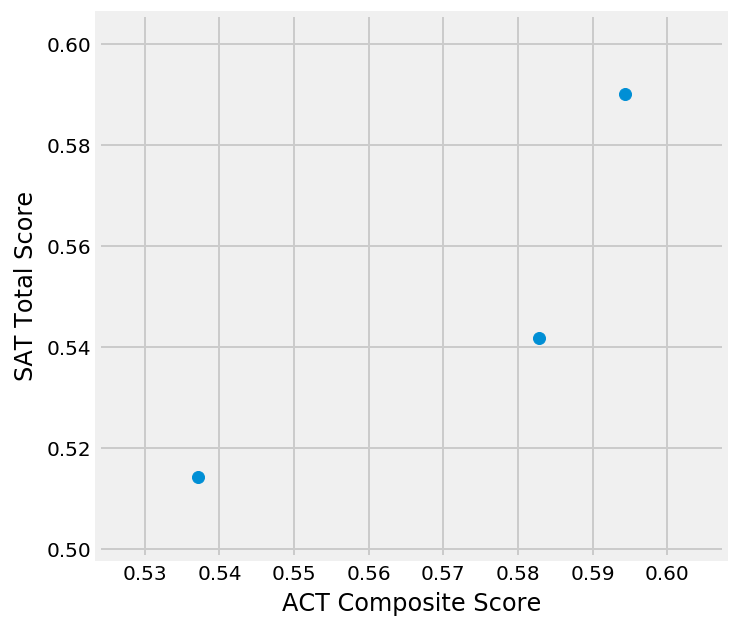

In [50]:
# Plot the normalized ACT vs SAT scores - only 3 data points so can't really make a correlation 
fig = plt.figure(figsize = (5,5))
ax1 = fig.add_subplot(111)

ax1.scatter(equal_part['ACT Composite Normalized'], equal_part['SAT Total Normalized']);

ax1.set_xlabel("ACT Composite Score")
ax1.set_ylabel("SAT Total Score");

In [51]:
# Number of states where ACT normalized score is higher
norm_tests[norm_tests['ACT Composite Normalized'] > norm_tests['SAT Total Normalized']].count()

State                                     22
SAT Participation                         22
SAT Evidence-Based Reading and Writing    22
SAT Math                                  22
SAT Total                                 22
ACT Participation                         22
ACT English                               22
ACT Math                                  22
ACT Reading                               22
ACT Science                               22
ACT Composite                             22
SAT Total Normalized                      22
ACT Composite Normalized                  22
dtype: int64

In [52]:
# Number of states where SAT normalized score is higher
norm_tests[norm_tests['ACT Composite Normalized'] < norm_tests['SAT Total Normalized']].count()

State                                     29
SAT Participation                         29
SAT Evidence-Based Reading and Writing    29
SAT Math                                  29
SAT Total                                 29
ACT Participation                         29
ACT English                               29
ACT Math                                  29
ACT Reading                               29
ACT Science                               29
ACT Composite                             29
SAT Total Normalized                      29
ACT Composite Normalized                  29
dtype: int64

It would seem based on comparing normalized total scores, that states tend to do better on the SAT than on the ACT, even if there is higher participation for the ACT. You can also see from the correlation that students tend to focus on one test and therefore have a high score on one and a lower score on the other. Again this makes sense, as studying for two different types of standardized tests requires more effort. Students focus on one or the other. I really wanted to compare normalized scores from states with similar participation rates but only could find 3 that matched this criteria. I suspect that this data is not telling the complete story since we have states with very high total scores but low participation rates (students self selecting). We can see that generally states with 100% participation have lower scores since it represents the whole distribution of students. Of the three states with similar participation, the ACT scores were higher. 

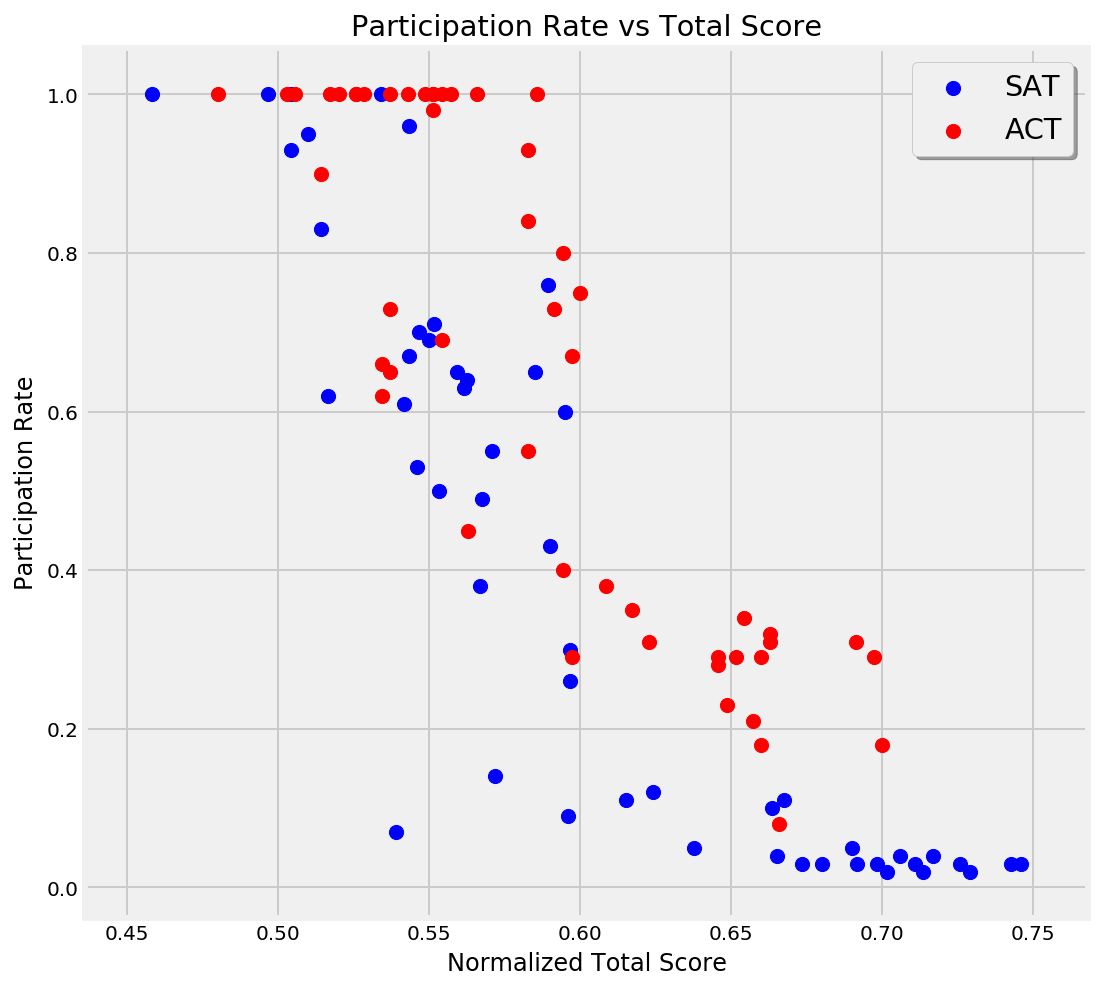

In [53]:
# Normalized total score vs participation rate on one plot for both tests 
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)

# Load data on plot
ax1.scatter(combined_tests['SAT Total Normalized'], combined_tests['SAT Participation'], s=50, c='b', label='SAT')
ax1.scatter(combined_tests['ACT Composite Normalized'], combined_tests['ACT Participation'], s=50, c='r', label='ACT');

# Create legend and labels 
plt.legend(loc='best', ncol=1, shadow=True, fancybox=True, fontsize = 'x-large');
ax1.set_title("Participation Rate vs Total Score")
ax1.set_xlabel("Normalized Total Score")
ax1.set_ylabel("Participation Rate");

The above participation rate vs normalized total score comparison again shows that with a 100% participation rate, the total scores tend to be lower. This is because we are capturing the total distribution (i.e. the whole eligible population). States with low partipation have higher scores since high achieving students are disproportionally represented. Unfortunately we can't compare the relative difficulty of the exams with the given data. Since we don't have individual student scores, only state mean scores, we don't know if the same students are taking both exams, i.e. if the participation eligibility is defined in the same way for both sets of data. There could also be super smart SAT only devoted students that don't take ACT, which may or may not be reflected in this dataset.

We can also see that there are significantly more states with less than 10% SAT participation compared to the ACT. As determined below, 18 states have less than 10% participation in the SAT, compared to only 1 for the ACT.

In [54]:
# Number of states with less than 10% SAT participation 
combined_tests[combined_tests['SAT Participation'] < 0.1].count()

State                                     18
SAT Participation                         18
SAT Evidence-Based Reading and Writing    18
SAT Math                                  18
SAT Total                                 18
ACT Participation                         18
ACT English                               18
ACT Math                                  18
ACT Reading                               18
ACT Science                               18
ACT Composite                             18
SAT Total Normalized                      18
ACT Composite Normalized                  18
dtype: int64

In [55]:
# Number of tests with less than 10% ACT participation 
combined_tests[combined_tests['ACT Participation'] < 0.1].count()

State                                     1
SAT Participation                         1
SAT Evidence-Based Reading and Writing    1
SAT Math                                  1
SAT Total                                 1
ACT Participation                         1
ACT English                               1
ACT Math                                  1
ACT Reading                               1
ACT Science                               1
ACT Composite                             1
SAT Total Normalized                      1
ACT Composite Normalized                  1
dtype: int64

##### 23. Create box plots for each variable. 

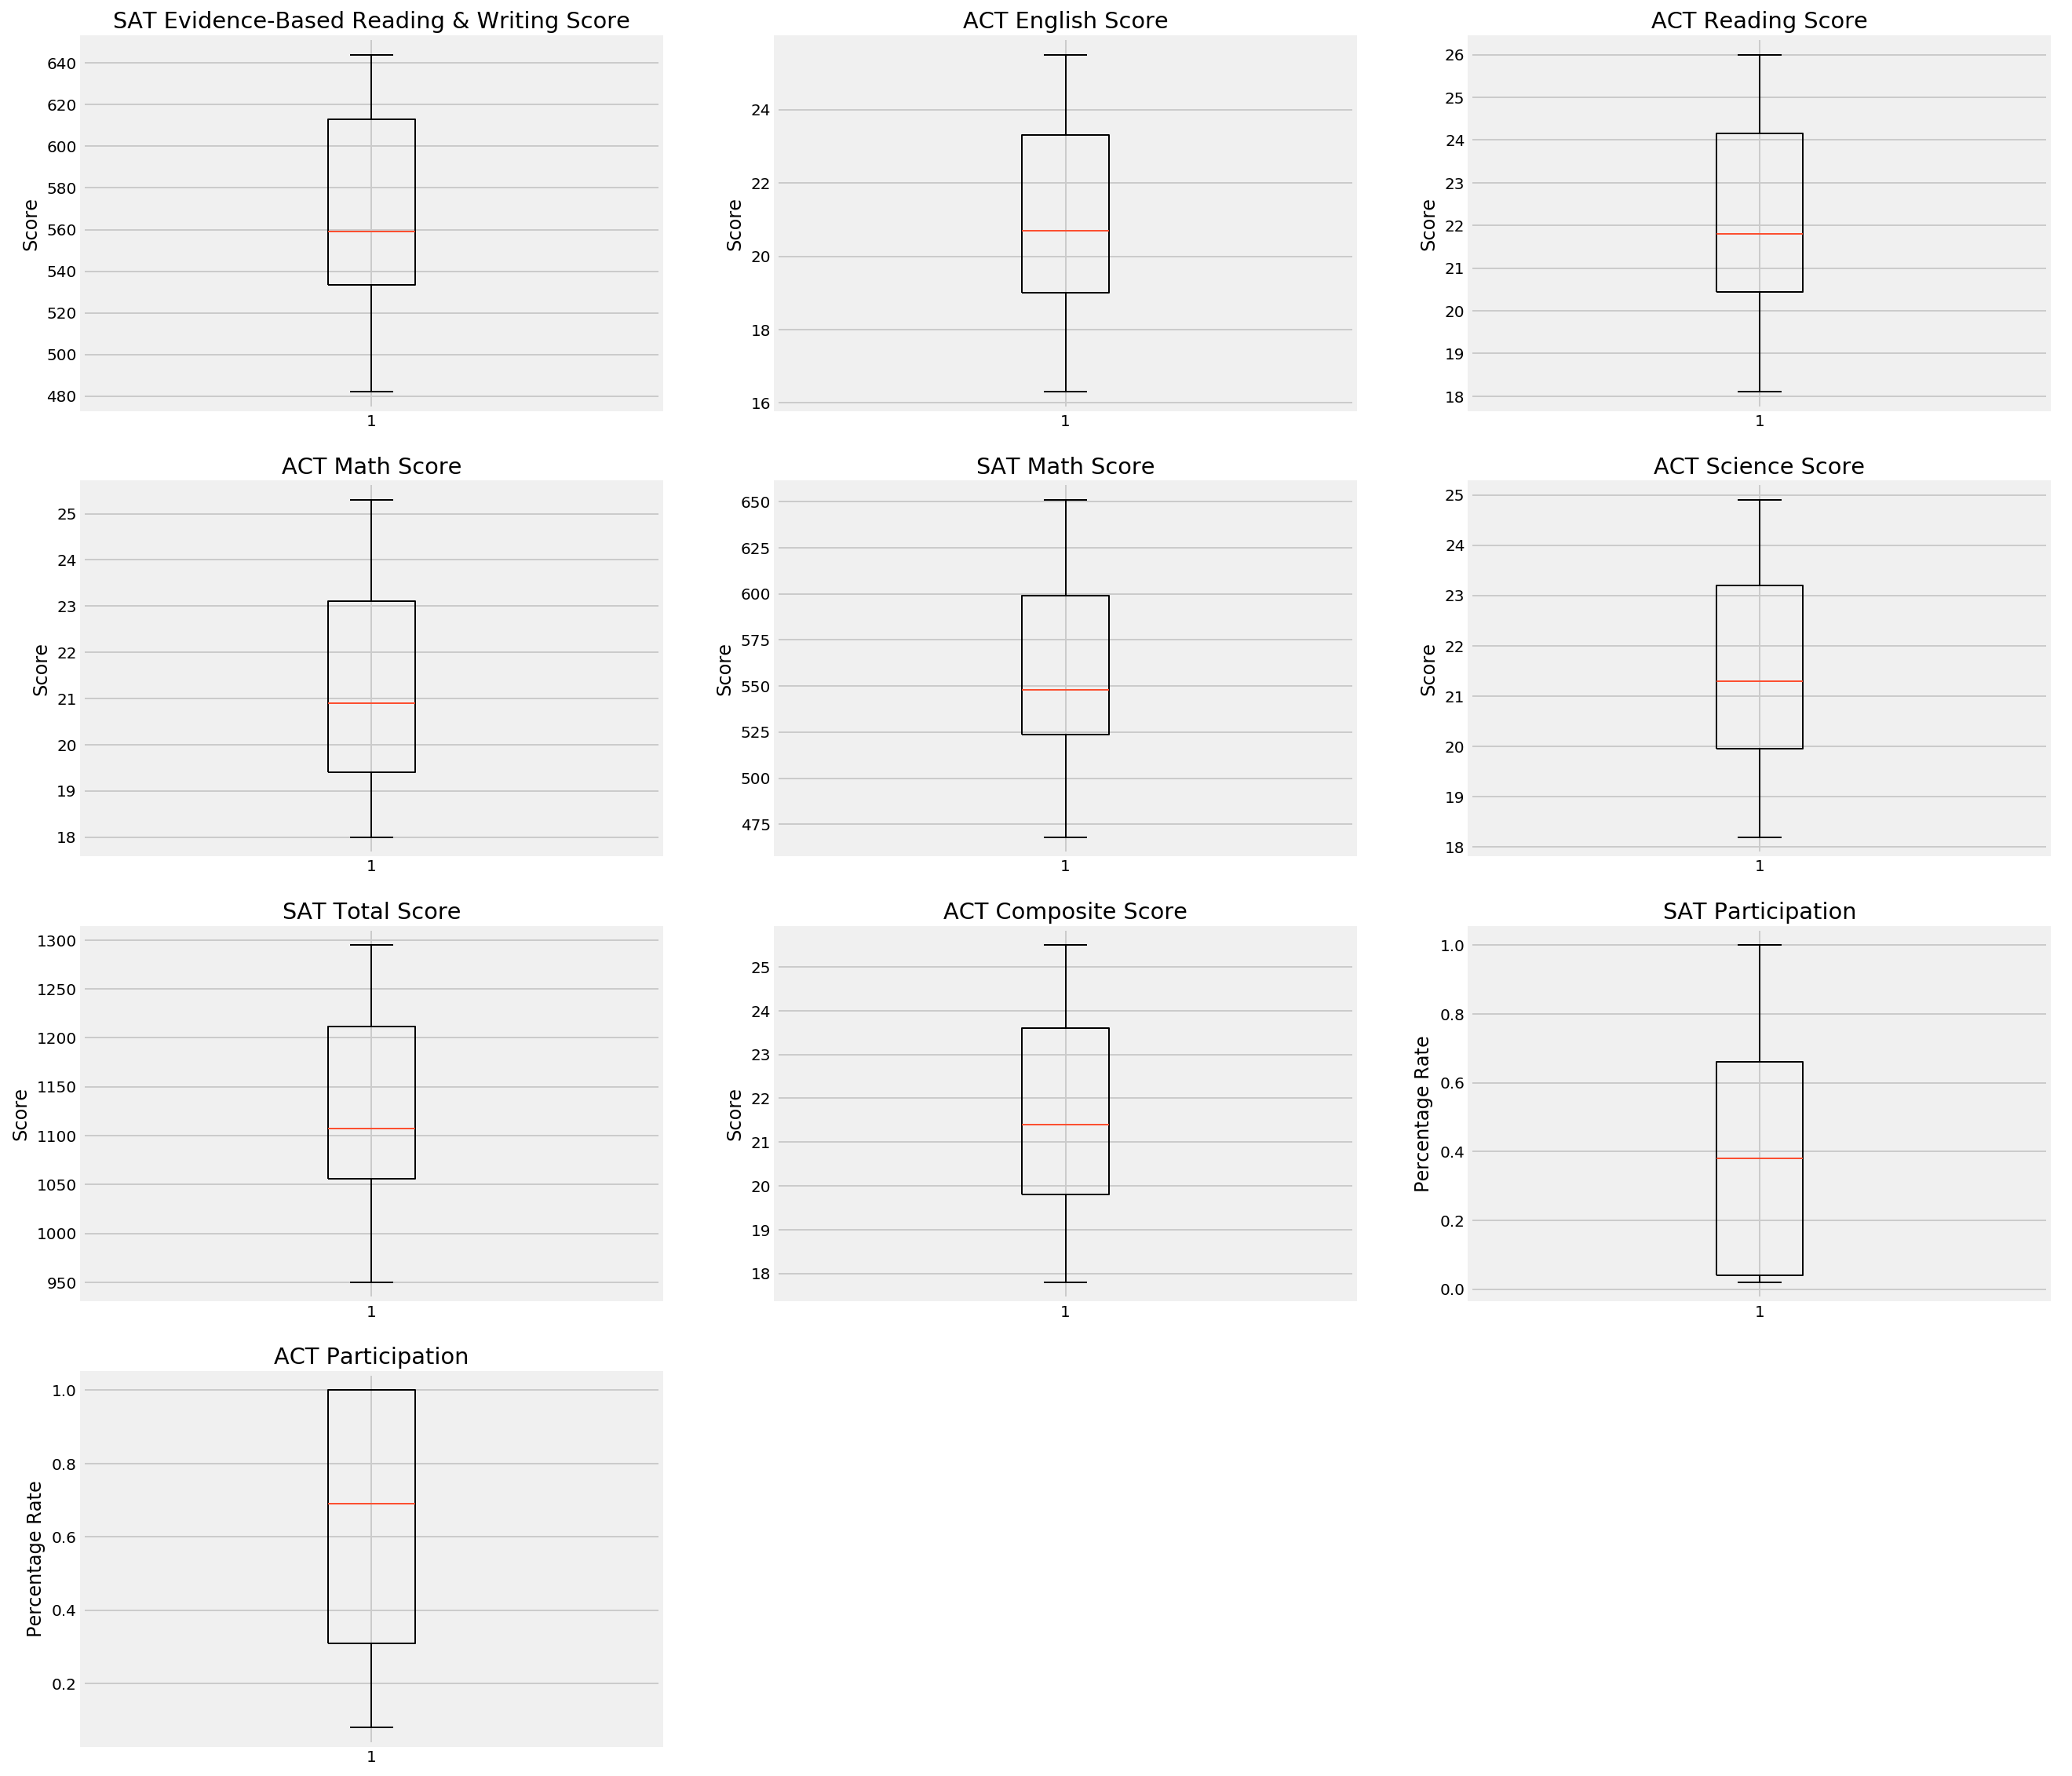

In [56]:
# Initialize the subplot grid and axes 
fig, ax = plt.subplots(4,3,figsize=(20,20))

# Create boxplots for each numeric column 
ax[0,0].boxplot(combined_tests["SAT Evidence-Based Reading and Writing"]);
ax[0,1].boxplot(combined_tests['ACT English']);
ax[0,2].boxplot(combined_tests['ACT Reading']);
ax[1,0].boxplot(combined_tests['ACT Math']);
ax[1,1].boxplot(combined_tests['SAT Math']);
ax[1,2].boxplot(combined_tests['ACT Science']);
ax[2,0].boxplot(combined_tests['SAT Total']);
ax[2,1].boxplot(combined_tests['ACT Composite']);
ax[2,2].boxplot(combined_tests['SAT Participation']);
ax[3,0].boxplot(combined_tests['ACT Participation']);
ax[3,1].axis('off');
ax[3,2].axis('off');


# Add title and axis labels 
ax[0,0].set_title("SAT Evidence-Based Reading & Writing Score");
ax[0,1].set_title("ACT English Score");
ax[0,2].set_title("ACT Reading Score");
ax[1,0].set_title("ACT Math Score");
ax[1,1].set_title("SAT Math Score");
ax[1,2].set_title("ACT Science Score");
ax[2,0].set_title("SAT Total Score");
ax[2,1].set_title("ACT Composite Score");
ax[2,2].set_title("SAT Participation");
ax[3,0].set_title("ACT Participation");
ax[0,0].set_ylabel("Score");
ax[0,1].set_ylabel("Score");
ax[0,2].set_ylabel("Score");
ax[1,0].set_ylabel("Score");
ax[1,1].set_ylabel("Score");
ax[1,2].set_ylabel("Score");
ax[2,0].set_ylabel("Score");
ax[2,1].set_ylabel("Score");
ax[2,2].set_ylabel("Percentage Rate");
ax[3,0].set_ylabel("Percentage Rate");

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

You can also view my public Tableau profile here: https://public.tableau.com/profile/caitlin.streamer#!/vizhome/ACTSATParticipation/Map

In [57]:
%%HTML
<div class='tableauPlaceholder' id='viz1525302866773' style='position: relative'><noscript><a href='#'><img alt='Head Map Board ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;AC&#47;ACTSATParticipation&#47;HeadMapBoard&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ACTSATParticipation&#47;HeadMapBoard' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;AC&#47;ACTSATParticipation&#47;HeadMapBoard&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1525302866773');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.minWidth='420px';vizElement.style.maxWidth='1150px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

We care about shape, center, and spread when looking at distributions. All of these answers can be found earlier in this notebook for each column, a summary is provided below: 

SAT Participation:
- Not normal 
- Slight right skew
- Mean is 0.40
- Standard deviation is 0.35

SAT Evidence-Based Reading and Writing:
- Not normal 
- Slight right skew
- Mean is 569.12
- Standard deviation is 45.67

SAT Math:
- Normal 
- Slight right skew
- Mean is 556.88
- Standard deviation is 47.12

SAT Total:
- Not normal 
- Slight right skew
- Mean is 1126.10
- Standard deviation is 92.49

ACT Participation:
- Not normal 
- Slight left skew
- Mean is 0.65
- Standard deviation is 0.32

ACT English:
- Normal 
- Slight right skew
- Mean is 20.93
- Standard deviation is 2.35

ACT Math: 
- Not normal 
- Slight right skew
- Mean is 21.18
- Standard deviation is 1.98

ACT Reading:
- Not normal 
- Slight right skew
- Mean is 22.01
- Standard deviation is 2.07

ACT Science:
- Normal 
- Slight right skew
- Mean is 21.45
- Standard deviation is 1.74

ACT Composite: 
- Not normal 
- Slight right skew
- Mean is 21.52
- Standard deviation is 2.02


##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

Again, the relationship between variables has been discussed at length earlier in this notebook. A general summary is provided below. 

We cannot directly compare SAT and ACT scores without first normalizing the scores since the tests are on different scoring scales. There is a negative linear correlation between normalized total SAT and ACT scores, indicating that students tend to do better on the SAT than on the ACT, even if there is higher participation for the ACT. You can also see from the correlation that students tend to focus on one test and therefore have a high score on one and a lower score on the other. Again this makes sense, as studying for two different types of standardized tests requires more effort.

When we compare the overall SAT Total score vs the subject tests, there is a positive linear correlation. States with students with higher mean subject scores will also have higher total scores since the subject scores contribute to the total score. When we graph all the subjects on the same plot, we see that states typically have higher mean reading & writing scores than math.

When we compare the overall ACT Composite score vs the subject tests, there is a positive linear correlation. States with students with higher mean subject scores will also have higher composite scores since the subject scores contribute to the composite score. When we graph all the subjects on the same plot, we see that states typically have higher mean reading scores than the other subjects.

For both tests, the higher participation rates result in a lower mean score for the state. This makes sense since they are capturing the whole eligble population, eliminating bias. The lower participation rates might have higher mean scores since motivated students, students who are going to do well on the test, are being disproportionately represented. It is for this reason that we can't confirm which test is more difficult with the given data.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

$H_0$: There is no difference between the mean ACT and SAT participation rates   
$H_1$: There is a difference between the mean ACT and SAT participation rates

$\alpha$ = 0.05 (level of significance) 

In [58]:
# Calculate point estimate (i.e. the difference between the mean ACT and SAT participation rates)
sat_mean = combined_tests['SAT Participation'].mean()
act_mean = combined_tests['ACT Participation'].mean()
test_diff = act_mean - sat_mean
print("The point estimate is",test_diff)

# Conduct a t-test by first calculating the t statistic and pvalue
t_stat, p_value = stats.ttest_ind(combined_tests['ACT Participation'], combined_tests['SAT Participation'])
print("The t statistic is {} and the p_value is {}".format(t_stat, p_value))

The point estimate is 0.2545098039215685
The t statistic is 3.8085778908170544 and the p_value is 0.00024134203698662353


From the point estimate we can see that there is a 25% difference between mean ACT and SAT participation rates. From this sample, it would appear that more students are taking the ACT than the SAT. In order to test that this result is not due to chance we must look at the p_value. 

Since the p_value < 0.05, we have sufficient evidence to reject the null hypothesis. There is indeed a difference between the mean ACT and SAT participation rates. 

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [59]:
# Calculate the standard error for the participation rates 
sat_sem = combined_tests['SAT Participation'].std() / (len(combined_tests['SAT Participation'])) ** 0.5
act_sem = combined_tests['ACT Participation'].std() / (len(combined_tests['ACT Participation'])) ** 0.5

# Generate the 95% confidence intervals using the means and standard errors 
print("The SAT confidence interval is:", stats.norm.interval(0.95, sat_mean, sat_sem))
print("The ACT confidence interval is:", stats.norm.interval(0.95, act_mean, act_sem))

The SAT confidence interval is: (0.30122255017332666, 0.4948558811992224)
The ACT confidence interval is: (0.5643385258470262, 0.74075951336866)


We are 95% confident that the true national mean participation rate lies within these ranges. Another way to interperet the confidence interval is that if we pulled 100 more samples and constructed confidence intervals in the same manner, we would expect that 95 of the intervals would contain the true mean. 

We can also see the the ACT confidence interval is much higher than that of the SAT. 

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No, it wasn't. The t-test rejected the null hyopthesis and suggested that there is a difference between SAT and ACT participation rates. The two confidence intervals don't even overlap, with the true mean ACT participation rate being much higher than that of the SAT. 

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

Not with the data in its current form. The two tests have different scoring scales so it is not appropriate to generate a correlation between them. If we normalized both scores, then we could compare them. 

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

This data is only from 2017. It doesn't make as much sense to conduct statistical inference given the data we have here because we can't see trends over time. For example, 2017 might be an abnormally low participation rate for certain states or abnormally high. The test format changes every so many years, which might have an impact on participation and mean scores. Given this, students might flock to the other test which hasn't changed and is in a more familiar format. The only way we have insight into these cases is by viewing the trends over time. We also only have the means from each states and not the individual scores (i.e. the entire dataset).